In [ ]:
## TODO: PRZED UMIESZCZENIEM W PRACY ZMIENIC KOLEJNOSC LABELI
## TODO: zmienic dla tej tabelki z feature importance dla klas: z Packets na packets

## SCVIC dataset import

In [ ]:
# imports
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import math
import datetime as dt

# data manipulation
import pandas as pd
import numpy as np

# data viz
#from dython.nominal import associations
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

# apply some cool styling
plt.style.use("ggplot")
rcParams['figure.figsize'] = (12,  6)

In [ ]:
# mounting the drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# importing SCVIC2021 data

%cd /content/drive/MyDrive/Colab Notebooks/

train = pd.read_csv("Training.csv")
test = pd.read_csv("Testing.csv")

train1 = pd.read_csv("lancuch1_train.csv", sep = ';')
train2 = pd.read_csv("lancuch2_train.csv", sep = ';')
train3 = pd.read_csv("lancuch3_train.csv", sep = ';')
train4 = pd.read_csv("lancuch4_train.csv", sep = ';')

train1.head()

/content/drive/MyDrive/Colab Notebooks


,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,Total Bwd packets,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,192.168.2.36-192.168.2.52-45313-21-6,192.168.2.36,45313,192.168.2.52,21,6,21/10/2015 09:57,861679,6,5,...,32,0.0,0.0,0.0,0.0,1.602165e+15,0.000000e+00,1.602165e+15,1.602165e+15,InitialCompromise
1,192.168.2.36-192.168.2.52-45853-6200-6,192.168.2.36,45853,192.168.2.52,6200,6,21/10/2015 09:57,313392,1,1,...,40,0.0,0.0,0.0,0.0,1.602165e+15,0.000000e+00,1.602165e+15,1.602165e+15,InitialCompromise
2,192.168.2.36-192.168.2.52-32983-6200-6,192.168.2.36,32983,192.168.2.52,6200,6,21/10/2015 09:57,4491447,7,6,...,32,575805.0,0.0,575805.0,575805.0,8.010827e+14,1.132902e+15,1.602165e+15,3.692786e+06,InitialCompromise
3,192.168.2.36-192.168.2.52-45313-21-6,192.168.2.36,45313,192.168.2.52,21,6,21/10/2015 09:58,39284,1,1,...,32,0.0,0.0,0.0,0.0,1.602165e+15,0.000000e+00,1.602165e+15,1.602165e+15,InitialCompromise
4,192.168.2.36-192.168.2.52-32983-6200-6,192.168.2.36,32983,192.168.2.52,6200,6,21/10/2015 09:58,1552259,8,7,...,32,0.0,0.0,0.0,0.0,1.602165e+15,0.000000e+00,1.602165e+15,1.602165e+15,InitialCompromise


In [ ]:
dataset = pd.concat([train, test])

In [ ]:
# make RUS sets for testing purposes

from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=0)
X_resampled, y_resampled = rus.fit_resample(dataset.drop(['Label'], axis = 1), dataset['Label'])
dataset_rus = pd.concat([X_resampled, y_resampled], axis = 1)
dataset_rus['Label'].value_counts()

DataExfiltration     150
InitialCompromise    150
LateralMovement      150
NormalTraffic        150
Pivoting             150
Reconnaissance       150
Name: Label, dtype: int64

## dzial

In [ ]:
# mounting the drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
# importing SCVIC2021 data

%cd /content/drive/MyDrive/Colab Notebooks/

train = pd.read_csv("Training.csv")
test = pd.read_csv("Testing.csv")

train1 = pd.read_csv("lancuch1_train.csv", sep = ';')
train2 = pd.read_csv("lancuch2_train.csv", sep = ';')
train3 = pd.read_csv("lancuch3_train.csv", sep = ';')
train4 = pd.read_csv("lancuch4_train.csv", sep = ';')

train1.head()

/content/drive/MyDrive/Colab Notebooks


,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,Total Bwd packets,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,192.168.2.36-192.168.2.52-45313-21-6,192.168.2.36,45313,192.168.2.52,21,6,21/10/2015 09:57,861679,6,5,...,32,0.0,0.0,0.0,0.0,1.602165e+15,0.000000e+00,1.602165e+15,1.602165e+15,InitialCompromise
1,192.168.2.36-192.168.2.52-45853-6200-6,192.168.2.36,45853,192.168.2.52,6200,6,21/10/2015 09:57,313392,1,1,...,40,0.0,0.0,0.0,0.0,1.602165e+15,0.000000e+00,1.602165e+15,1.602165e+15,InitialCompromise
2,192.168.2.36-192.168.2.52-32983-6200-6,192.168.2.36,32983,192.168.2.52,6200,6,21/10/2015 09:57,4491447,7,6,...,32,575805.0,0.0,575805.0,575805.0,8.010827e+14,1.132902e+15,1.602165e+15,3.692786e+06,InitialCompromise
3,192.168.2.36-192.168.2.52-45313-21-6,192.168.2.36,45313,192.168.2.52,21,6,21/10/2015 09:58,39284,1,1,...,32,0.0,0.0,0.0,0.0,1.602165e+15,0.000000e+00,1.602165e+15,1.602165e+15,InitialCompromise
4,192.168.2.36-192.168.2.52-32983-6200-6,192.168.2.36,32983,192.168.2.52,6200,6,21/10/2015 09:58,1552259,8,7,...,32,0.0,0.0,0.0,0.0,1.602165e+15,0.000000e+00,1.602165e+15,1.602165e+15,InitialCompromise


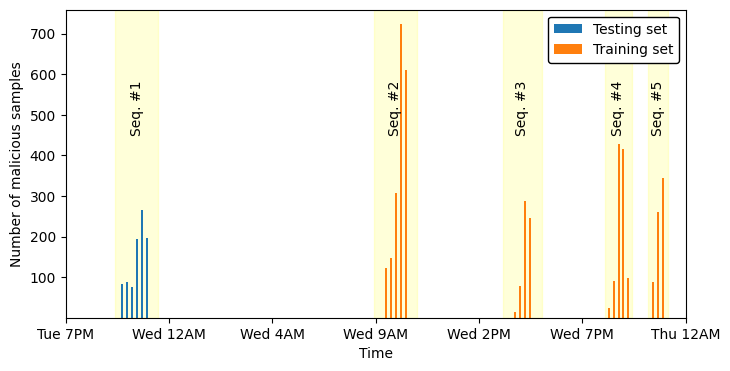

In [ ]:
#TO JEST POPRAWNIE DZIALAJACE WYSTARCZY URUCHOMIC IMPORT DANYCH I ODPALIC TA KOMORKE

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime
import pandas as pd

from sklearn.model_selection import train_test_split

#reload_chains()

# Przekształcenie kolumny Timestamp na obiekt datetime
test['Timestamp'] = pd.to_datetime(test['Timestamp'])
train = pd.concat([train1, train2, train3, train4])

train['Timestamp'] = pd.to_datetime(train['Timestamp'], format='%d/%m/%Y %H:%M')
test['Timestamp'] = pd.to_datetime(test['Timestamp'], format='%d/%m/%Y %H:%M')

# Połącz dane z train i test
#all_data = pd.concat([train, test[test['Label']!='NormalTraffic']], ignore_index=True)

# Podziel dane na dwa zbiory (st'), ale tak naprawdę jest to tylko technika mieszania
#train, test = train_test_split(all_data, test_size=0.2, random_state=42)

# Funkcja pomocnicza do konwersji daty na format numeryczny
def d2n(dt):
    return mdates.date2num(dt)

# ... [Tutaj zakładam, że masz wcześniej wczytane dane]

# Ustawienie rozmiaru figury
plt.figure(figsize=(8, 4))

# Ustawienie stylu
plt.style.use('default')

ax = plt.gca()

# Ustawienie formatu osi X
ax.xaxis.set_major_formatter(mdates.DateFormatter('%a %-I%p'))

# Ustawienie zakresu osi X
plt.xlim(d2n(datetime.datetime(2015, 10, 20, 20, 00)), d2n(datetime.datetime(2015, 10, 21, 23, 59)))

chains = [
    (datetime.datetime(2015, 10, 20, 21, 30), datetime.datetime(2015, 10, 20, 23, 30), "Seq. #1", 'yellow'),
    (datetime.datetime(2015, 10, 21, 9, 30), datetime.datetime(2015, 10, 21, 11, 30), "Seq. #2", 'yellow'),
    (datetime.datetime(2015, 10, 21, 15, 30), datetime.datetime(2015, 10, 21, 17, 20), "Seq. #3", 'yellow'),
    (datetime.datetime(2015, 10, 21, 20, 15), datetime.datetime(2015, 10, 21, 21, 30), "Seq. #4", 'yellow'),
    (datetime.datetime(2015, 10, 21, 22, 15), datetime.datetime(2015, 10, 21, 23, 10), "Seq. #5", 'yellow')
]

for start, end, label, color in chains:
    ax.axvspan(d2n(start), d2n(end), color=color, alpha=0.15)

# Renderowanie histogramu z ustawieniem stackowania słupków
plt.hist([ [d2n(ts) for ts in test[test['Label'] != 'NormalTraffic']['Timestamp']], [d2n(ts) for ts in train['Timestamp']] ],
         bins=110,
         label=['Testing set', 'Training set'],
         alpha=1.0,
         stacked=False)

# Dodanie tekstu dla łańcuchów po renderowaniu histogramu
for start, end, label, color in chains:
    ax.text((d2n(start) + d2n(end)) / 2, ax.get_ylim()[1] * 0.6, label, ha='center', rotation=90)

# Ustawienie legendy
legend = plt.legend(frameon=True, loc='upper right', framealpha = 1.0)
frame = legend.get_frame()
frame.set_facecolor('white')
frame.set_edgecolor('black')

# Ustawienie tytułu oraz etykiet osi
plt.xlabel('Time')
plt.ylabel('Number of malicious samples')

# Wyłączenie siatki
ax.grid(False)

# Ustawienie ramki wokół wykresu
for spine in ax.spines.values():
    spine.set_visible(True)
    spine.set_color('black')

# Usunięcie pierwszej i ostatniej pozycji z osi X
xticks = ax.get_xticks().tolist()
if xticks:
    xticks = xticks[0:]
ax.set_xticks(xticks)



# Usunięcie pierwszej i ostatniej pozycji z osi Y
yticks = ax.get_yticks().tolist()
if yticks:
    yticks = yticks[1:-1]
ax.set_yticks(yticks)

# Ustawienie białego tła
ax.set_facecolor('white')

# Wyświetlenie wykresu
plt.show()


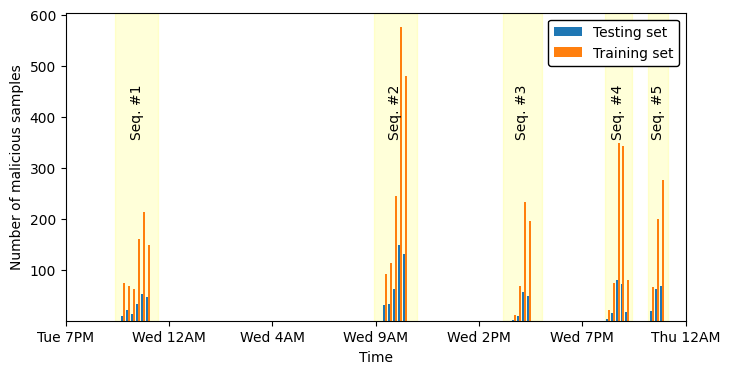

In [ ]:
#TO JEST POPRAWNIE DZIALAJACE WYSTARCZY URUCHOMIC IMPORT DANYCH I ODPALIC TA KOMORKE

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime
import pandas as pd

from sklearn.model_selection import train_test_split

#reload_chains()

# Przekształcenie kolumny Timestamp na obiekt datetime
test['Timestamp'] = pd.to_datetime(test['Timestamp'])
train = pd.concat([train1, train2, train3, train4])

train['Timestamp'] = pd.to_datetime(train['Timestamp'], format='%d/%m/%Y %H:%M')
test['Timestamp'] = pd.to_datetime(test['Timestamp'], format='%d/%m/%Y %H:%M')

# Połącz dane z train i test
all_data = pd.concat([train, test[test['Label']!='NormalTraffic']], ignore_index=True)

# Podziel dane na dwa zbiory (st'), ale tak naprawdę jest to tylko technika mieszania
train, test = train_test_split(all_data, test_size=0.2, random_state=42)

# Funkcja pomocnicza do konwersji daty na format numeryczny
def d2n(dt):
    return mdates.date2num(dt)

# ... [Tutaj zakładam, że masz wcześniej wczytane dane]

# Ustawienie rozmiaru figury
plt.figure(figsize=(8, 4))

# Ustawienie stylu
plt.style.use('default')

ax = plt.gca()

# Ustawienie formatu osi X
ax.xaxis.set_major_formatter(mdates.DateFormatter('%a %-I%p'))

# Ustawienie zakresu osi X
plt.xlim(d2n(datetime.datetime(2015, 10, 20, 20, 00)), d2n(datetime.datetime(2015, 10, 21, 23, 59)))

chains = [
    (datetime.datetime(2015, 10, 20, 21, 30), datetime.datetime(2015, 10, 20, 23, 30), "Seq. #1", 'yellow'),
    (datetime.datetime(2015, 10, 21, 9, 30), datetime.datetime(2015, 10, 21, 11, 30), "Seq. #2", 'yellow'),
    (datetime.datetime(2015, 10, 21, 15, 30), datetime.datetime(2015, 10, 21, 17, 20), "Seq. #3", 'yellow'),
    (datetime.datetime(2015, 10, 21, 20, 15), datetime.datetime(2015, 10, 21, 21, 30), "Seq. #4", 'yellow'),
    (datetime.datetime(2015, 10, 21, 22, 15), datetime.datetime(2015, 10, 21, 23, 10), "Seq. #5", 'yellow')
]

for start, end, label, color in chains:
    ax.axvspan(d2n(start), d2n(end), color=color, alpha=0.15)

# Renderowanie histogramu z ustawieniem stackowania słupków
plt.hist([ [d2n(ts) for ts in test[test['Label'] != 'NormalTraffic']['Timestamp']], [d2n(ts) for ts in train['Timestamp']] ],
         bins=110,
         label=['Testing set', 'Training set'],
         alpha=1.0,
         stacked=False)

# Dodanie tekstu dla łańcuchów po renderowaniu histogramu
for start, end, label, color in chains:
    ax.text((d2n(start) + d2n(end)) / 2, ax.get_ylim()[1] * 0.6, label, ha='center', rotation=90)

# Ustawienie legendy
legend = plt.legend(frameon=True, loc='upper right', framealpha = 1.0)
frame = legend.get_frame()
frame.set_facecolor('white')
frame.set_edgecolor('black')

# Ustawienie tytułu oraz etykiet osi
plt.xlabel('Time')
plt.ylabel('Number of malicious samples')

# Wyłączenie siatki
ax.grid(False)

# Ustawienie ramki wokół wykresu
for spine in ax.spines.values():
    spine.set_visible(True)
    spine.set_color('black')

# Usunięcie pierwszej i ostatniej pozycji z osi X
xticks = ax.get_xticks().tolist()
if xticks:
    xticks = xticks[0:]
ax.set_xticks(xticks)



# Usunięcie pierwszej i ostatniej pozycji z osi Y
yticks = ax.get_yticks().tolist()
if yticks:
    yticks = yticks[1:-1]
ax.set_yticks(yticks)

# Ustawienie białego tła
ax.set_facecolor('white')

# Wyświetlenie wykresu
plt.show()


## Boxplots

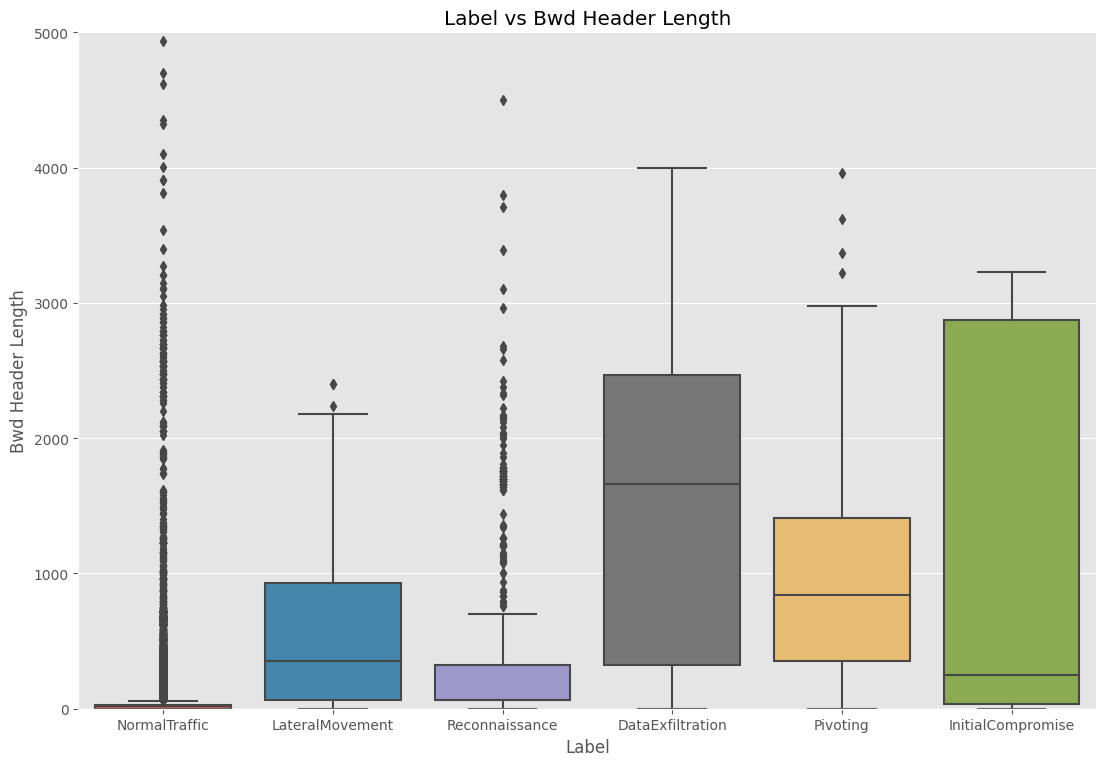

In [ ]:

g = sns.catplot(x="Label", y="Bwd Header Length", data=dataset, kind="box", aspect=1.5)
g.fig.set_figwidth(12)
g.fig.set_figheight(8)
plt.title("Label vs Bwd Header Length")
plt.ylim(0, 5000)

plt.show()


In [ ]:
sns.color_palette()[2]

(0.596078431372549, 0.5568627450980392, 0.8352941176470589)

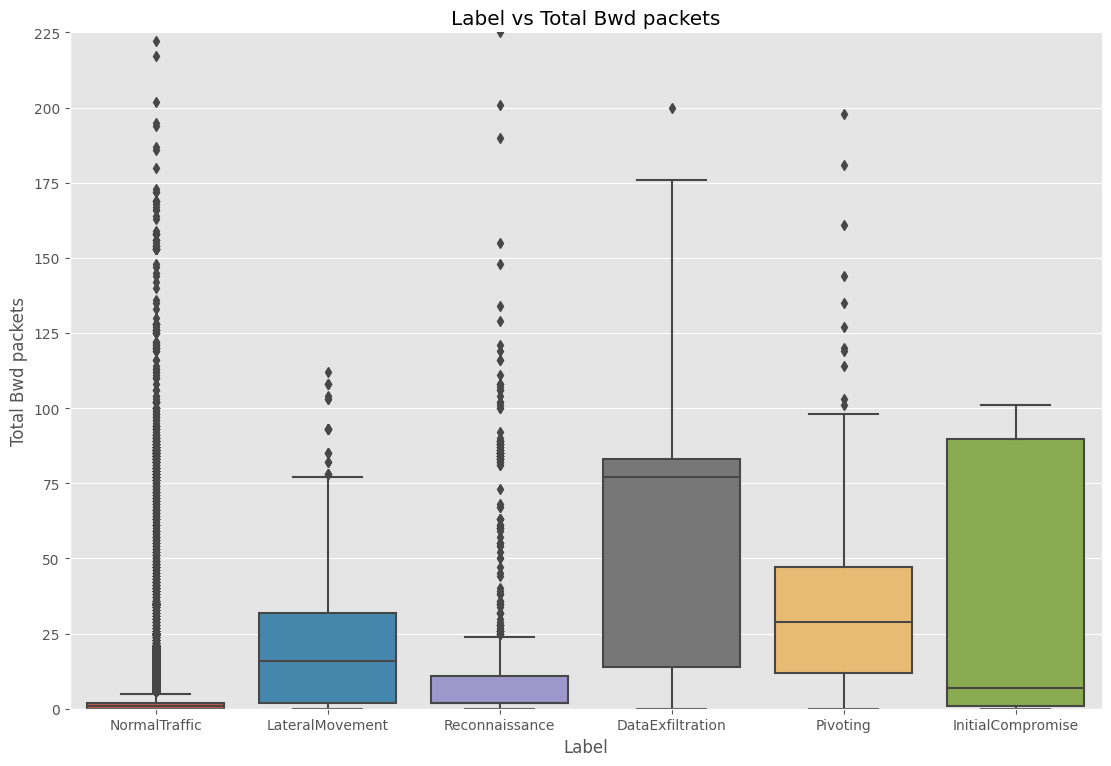

In [ ]:
g = sns.catplot(x="Label", y="Total Bwd packets", data=dataset, kind="box", aspect=1.5)
g.fig.set_figwidth(12)
g.fig.set_figheight(8)
plt.title("Label vs Total Bwd packets")
plt.ylim(0, 225)

plt.show()

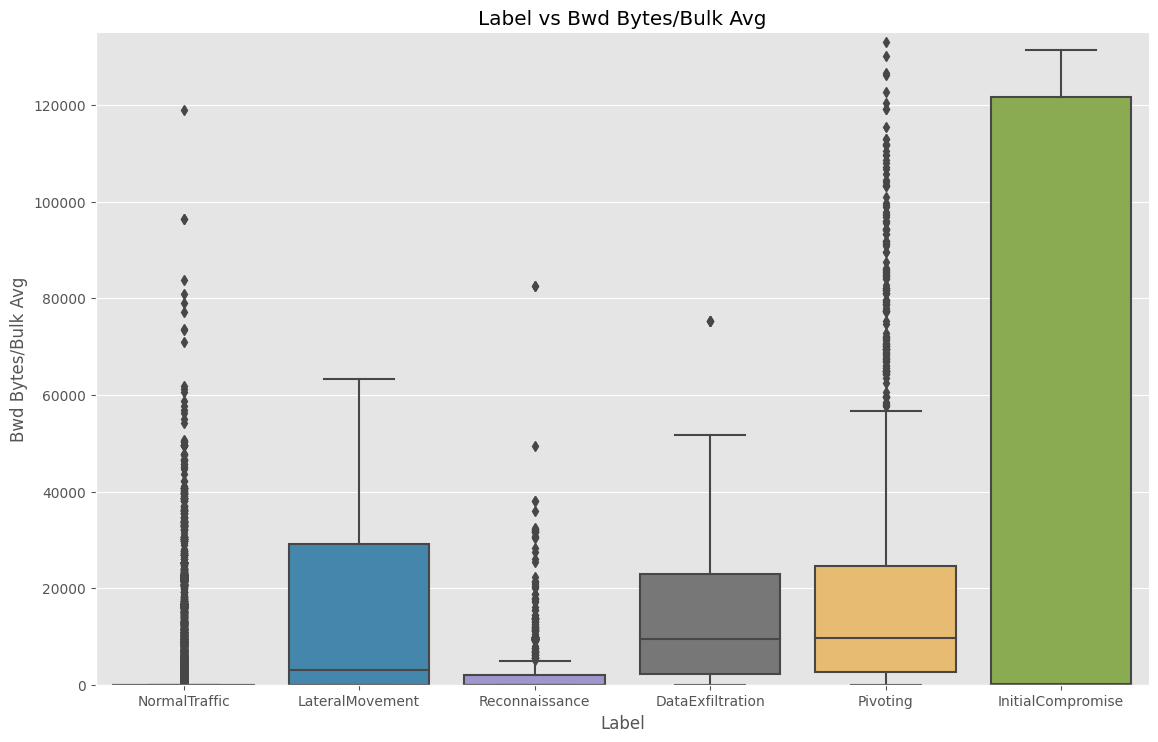

In [ ]:
g = sns.catplot(x="Label", y="Bwd Bytes/Bulk Avg", data=dataset, kind="box", aspect=1.5)
g.fig.set_figwidth(12)
g.fig.set_figheight(8)
plt.title("Label vs Bwd Bytes/Bulk Avg")
plt.ylim(0, 135000)

plt.show()

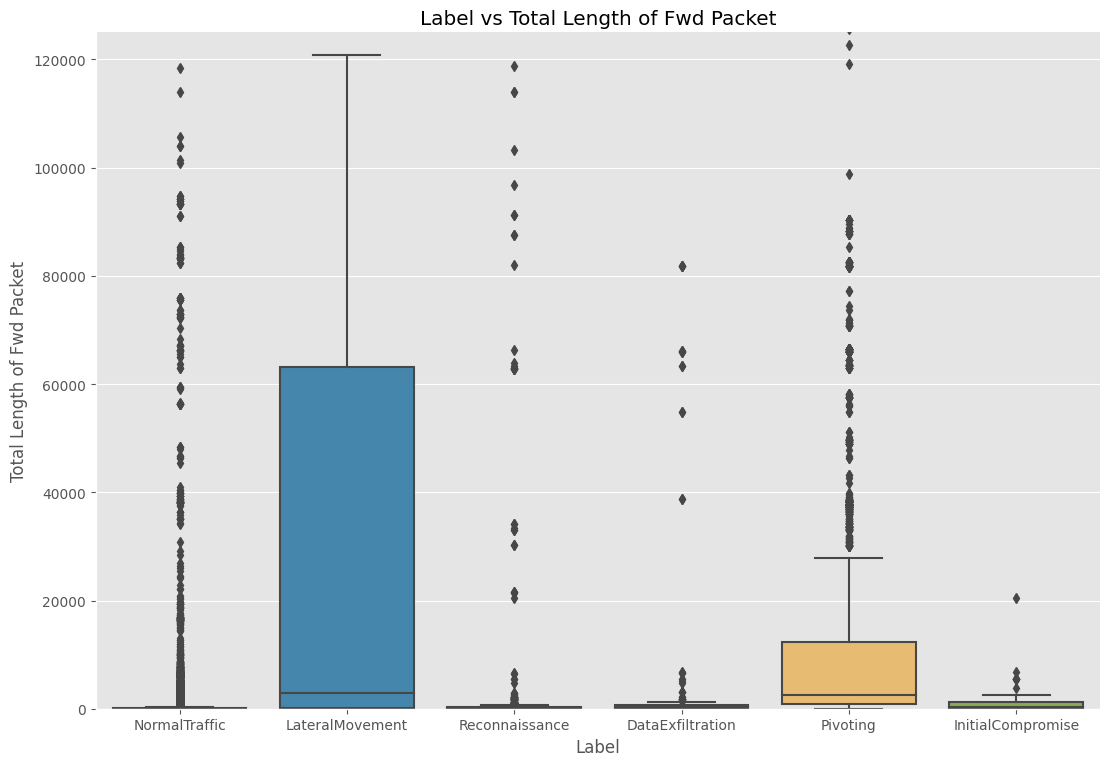

In [ ]:
g = sns.catplot(x="Label", y="Total Length of Fwd Packet", data=dataset, kind="box", aspect=1.5)
g.fig.set_figwidth(12)
g.fig.set_figheight(8)
plt.title("Label vs Total Length of Fwd Packet")
plt.ylim(0, 125000)

plt.show()

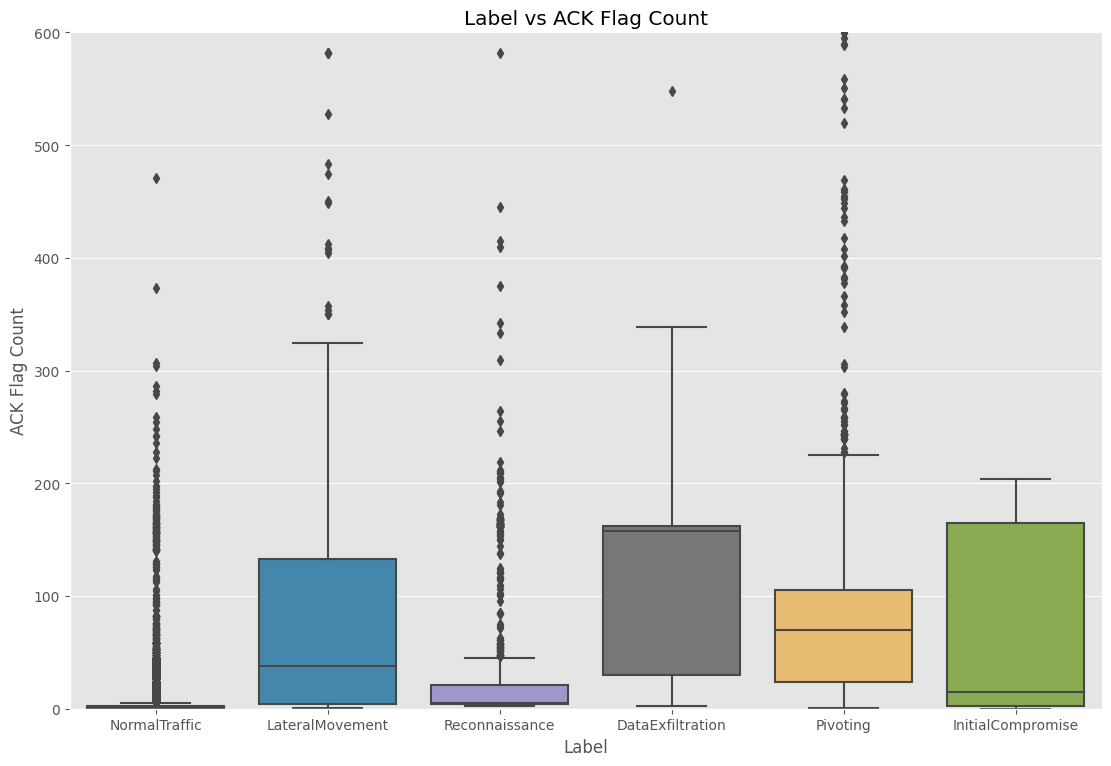

In [ ]:
g = sns.catplot(x="Label", y="ACK Flag Count", data=dataset, kind="box", aspect=1.5)
g.fig.set_figwidth(12)
g.fig.set_figheight(8)
plt.title("Label vs ACK Flag Count")
plt.ylim(0, 600)

plt.show()

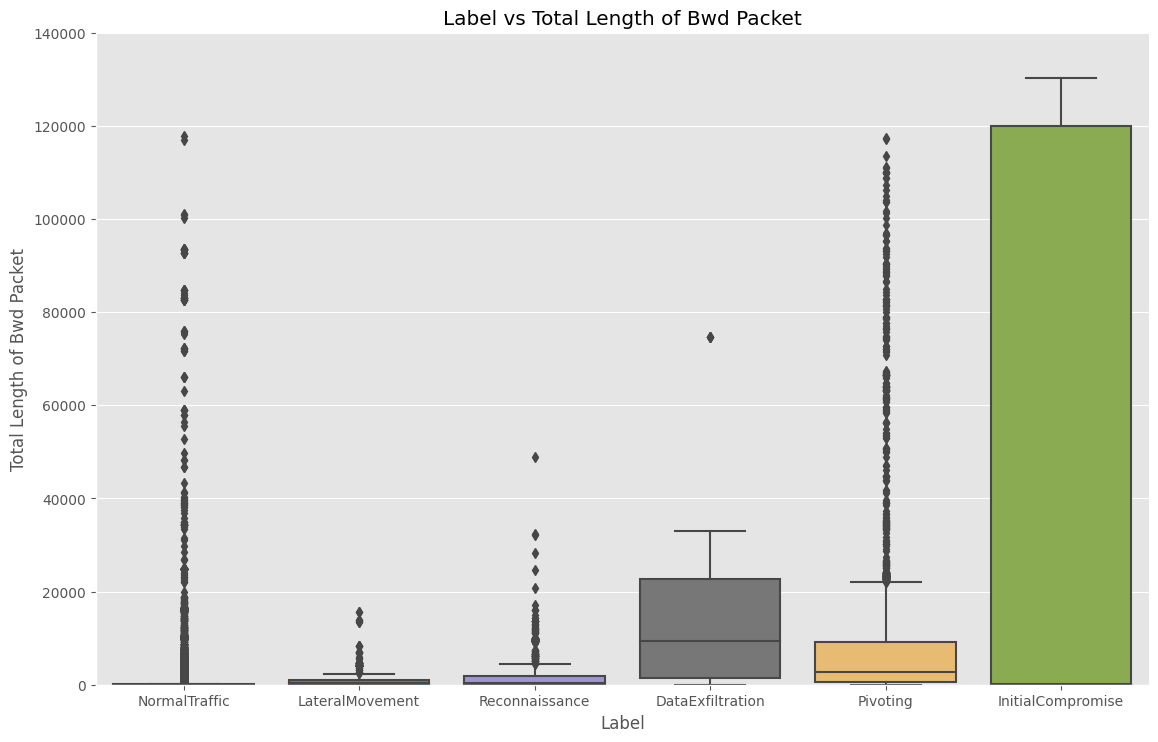

In [ ]:
g = sns.catplot(x="Label", y="Total Length of Bwd Packet", data=dataset, kind="box", aspect=1.5)
g.fig.set_figwidth(12)
g.fig.set_figheight(8)
plt.title("Label vs Total Length of Bwd Packet")
plt.ylim(0, 140000)

plt.show()

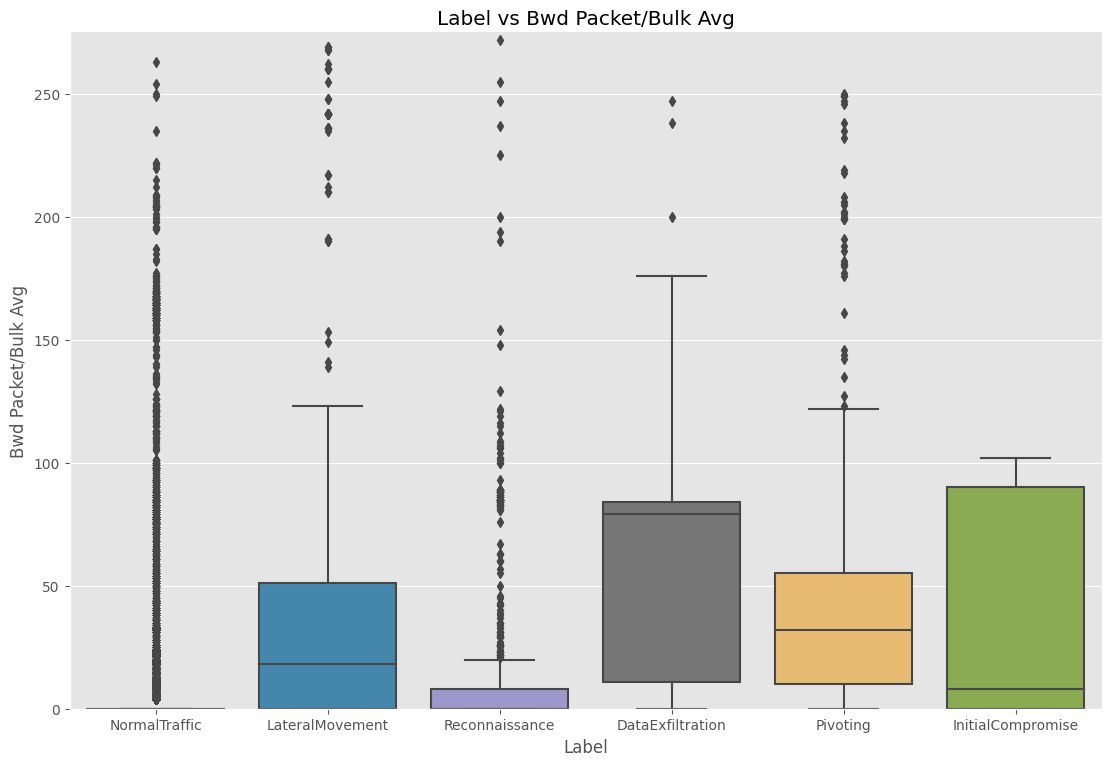

In [ ]:
g = sns.catplot(x="Label", y="Bwd Packet/Bulk Avg", data=dataset, kind="box", aspect=1.5)
g.fig.set_figwidth(12)
g.fig.set_figheight(8)
plt.title("Label vs Bwd Packet/Bulk Avg")
plt.ylim(0, 275)

plt.show()

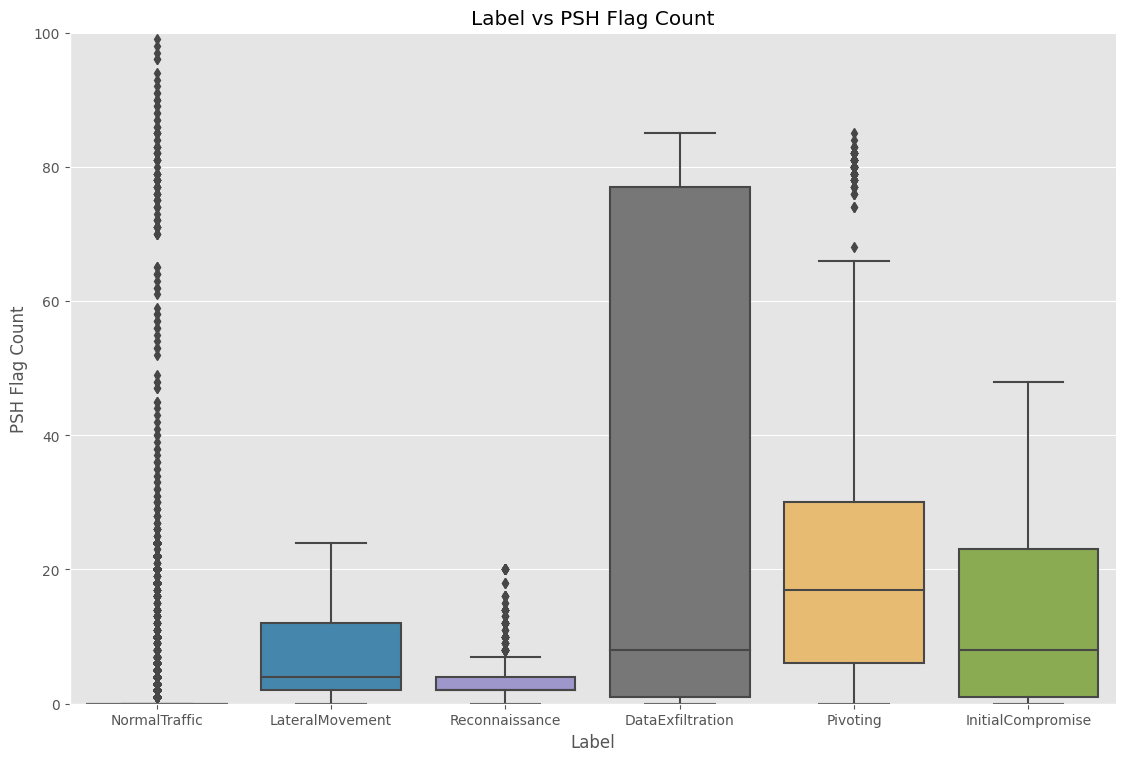

In [ ]:
g = sns.catplot(x="Label", y="PSH Flag Count", data=dataset, kind="box", aspect=1.5)
g.fig.set_figwidth(12)
g.fig.set_figheight(8)
plt.title("Label vs PSH Flag Count")
plt.ylim(0, 100)

plt.show()

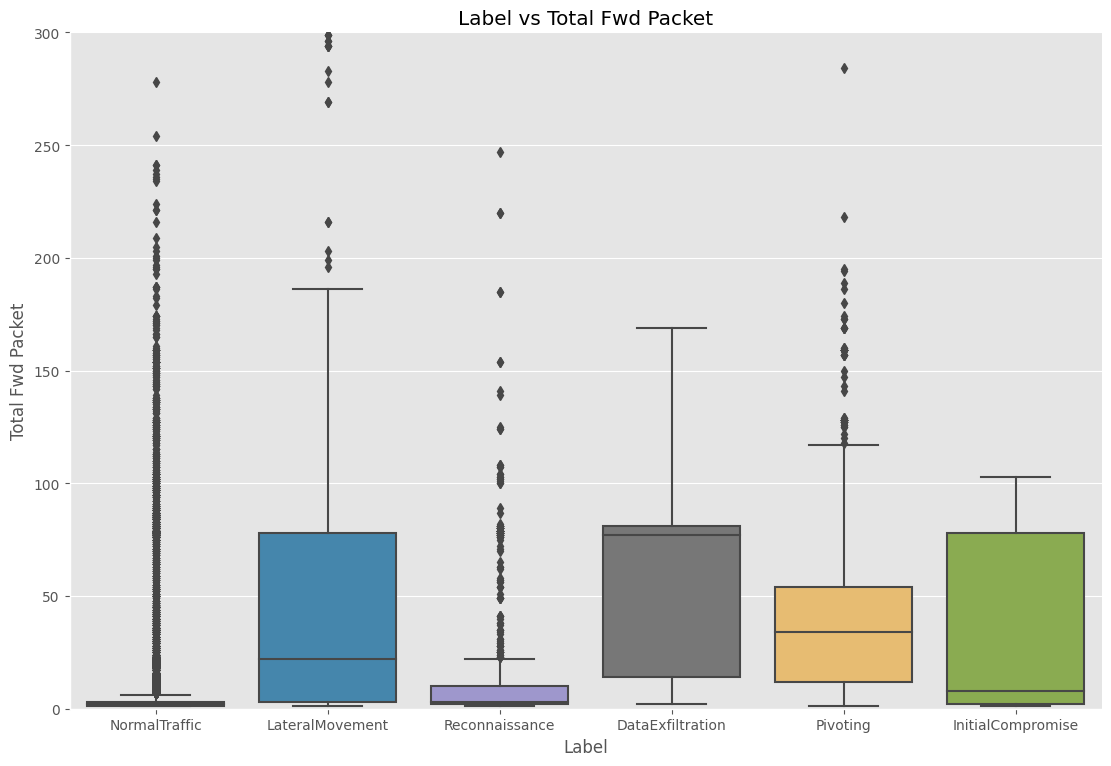

In [ ]:
g = sns.catplot(x="Label", y="Total Fwd Packet", data=dataset, kind="box", aspect=1.5)
g.fig.set_figwidth(12)
g.fig.set_figheight(8)
plt.title("Label vs Total Fwd Packet")
plt.ylim(0, 300)

plt.show()

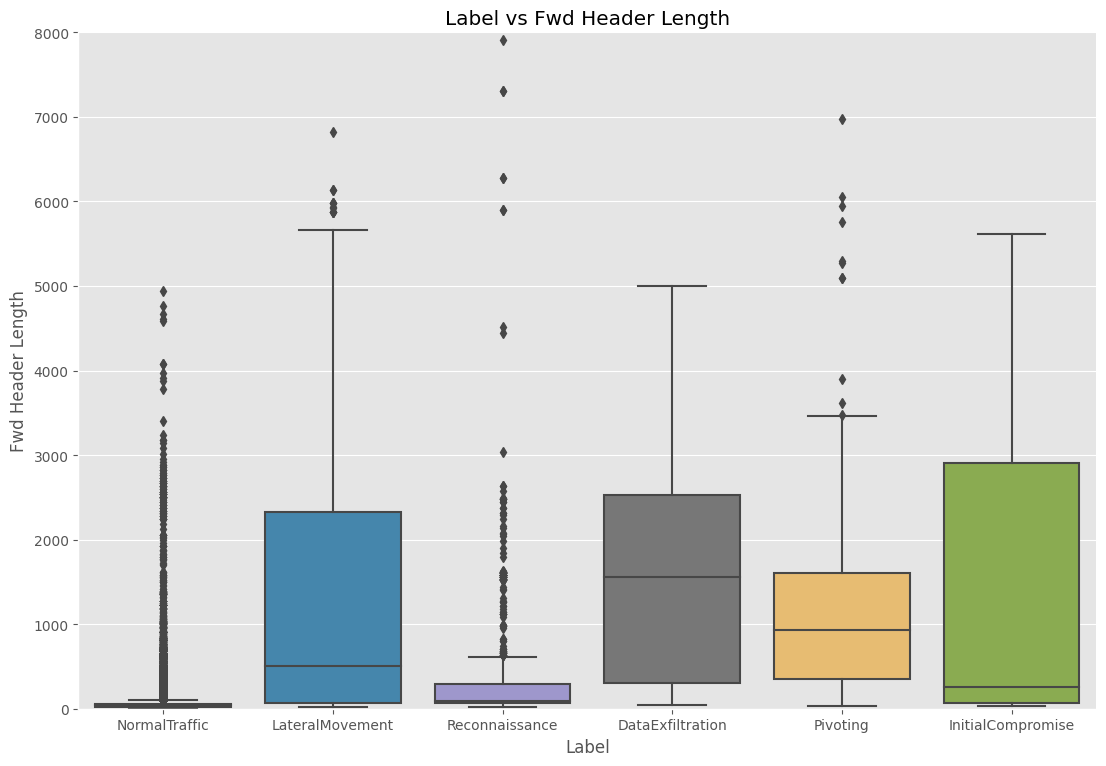

In [ ]:
g = sns.catplot(x="Label", y="Fwd Header Length", data=dataset, kind="box", aspect=1.5)
g.fig.set_figwidth(12)
g.fig.set_figheight(8)
plt.title("Label vs Fwd Header Length")
plt.ylim(0, 8000)

plt.show()

9Total Fwd Packet 39, 2Total Bwd Packets 59[x], 4Total Length of Fwd Packet 51[x], 6Total Length of Bwd Packet 46[x], 10Fwd Header Length 38, 1Bwd Header Length 68[x], 8PSH Flag Count 44[x], 5ACK Flag Count 48[x], 3Bwd Bytes/Bulk Avg 55[x], 7Bwd Packet/Bulk Avg 46[x]

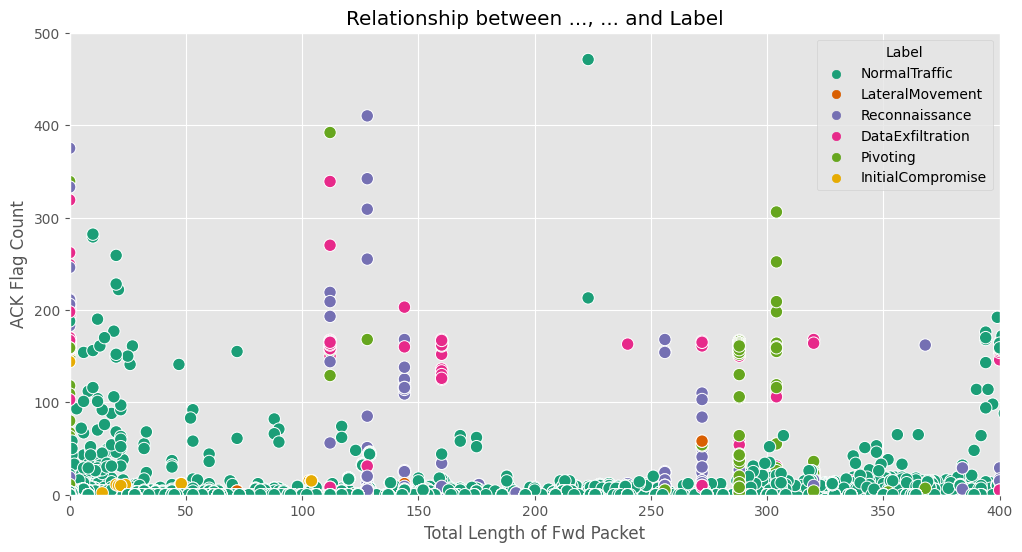

In [ ]:
sns.scatterplot(x="Total Length of Fwd Packet", y="ACK Flag Count", hue="Label", data=dataset, palette="Dark2", s=80)
plt.title("Relationship between ..., ... and Label")
plt.ylim(0, 500)
plt.xlim(0, 400)

plt.show()

In [ ]:
# making most imporant features for each label hotmap

df = pd.DataFrame()

## Pivoting/ DataExfiltration labelling problem

In [ ]:
dataset['Label'].value_counts()

NormalTraffic        310419
Pivoting               2482
Reconnaissance         1084
LateralMovement         871
DataExfiltration        601
InitialCompromise       150
Name: Label, dtype: int64

In [ ]:
# making pivoting, dataexfiltration dataset

dataset_PDE = dataset.loc[(dataset['Label'] == 'Pivoting') | (dataset['Label'] == 'DataExfiltration')]
dataset_PDE['Label'].value_counts()

Pivoting            2482
DataExfiltration     601
Name: Label, dtype: int64

In [ ]:
sns.color_palette()

[(0.8862745098039215, 0.2901960784313726, 0.2),
 (0.20392156862745098, 0.5411764705882353, 0.7411764705882353),
 (0.596078431372549, 0.5568627450980392, 0.8352941176470589),
 (0.4666666666666667, 0.4666666666666667, 0.4666666666666667),
 (0.984313725490196, 0.7568627450980392, 0.3686274509803922),
 (0.5568627450980392, 0.7294117647058823, 0.25882352941176473),
 (1.0, 0.7098039215686275, 0.7215686274509804)]

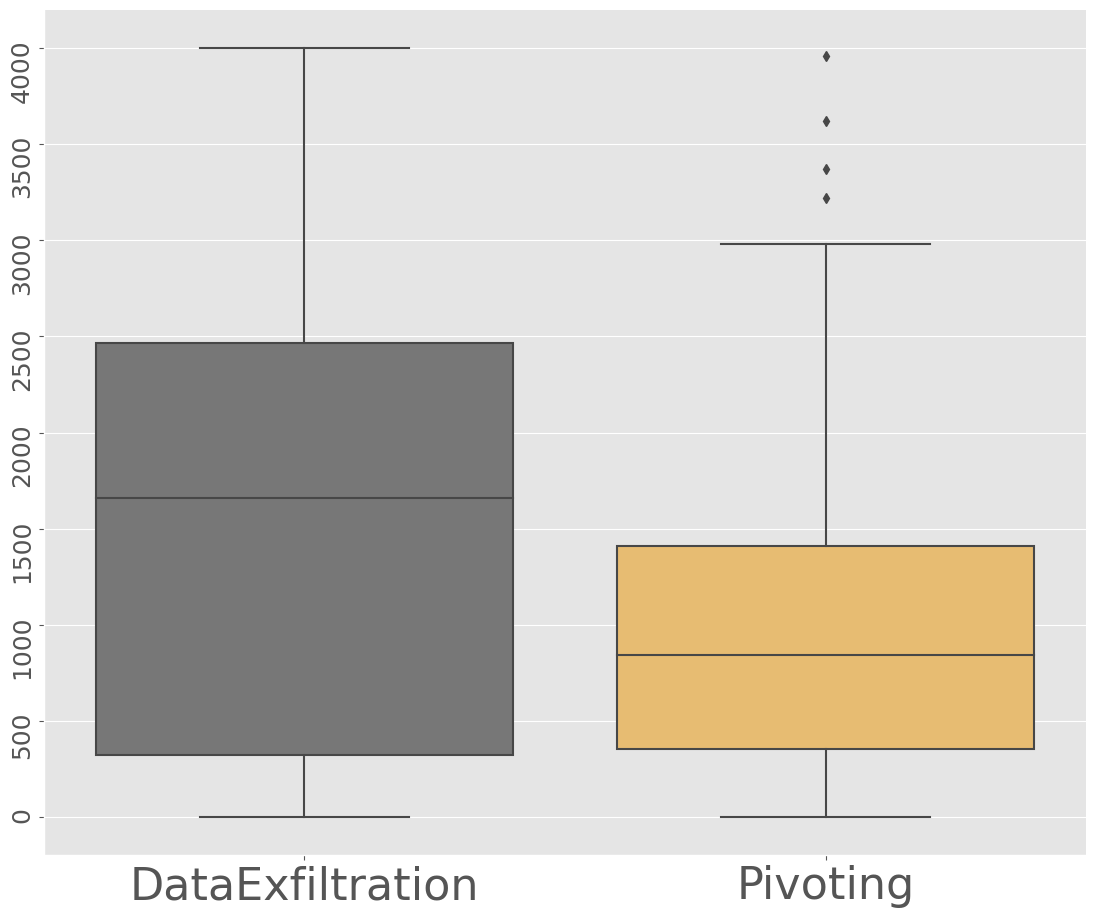

In [ ]:
g = sns.catplot(x="Label", y="Bwd Header Length", data=dataset_PDE, kind="box", aspect=1.5, palette=sns.color_palette([sns.color_palette()[3], sns.color_palette()[4]]))
g.fig.set_figwidth(12)
g.fig.set_figheight(10)
#plt.title("Label vs PSH Flag Count")
#plt.ylim(0, 8000)
plt.xticks(fontsize=32)
plt.yticks(fontsize=18,  rotation = 90)
plt.xlabel(None)
plt.ylabel(None)

plt.show()

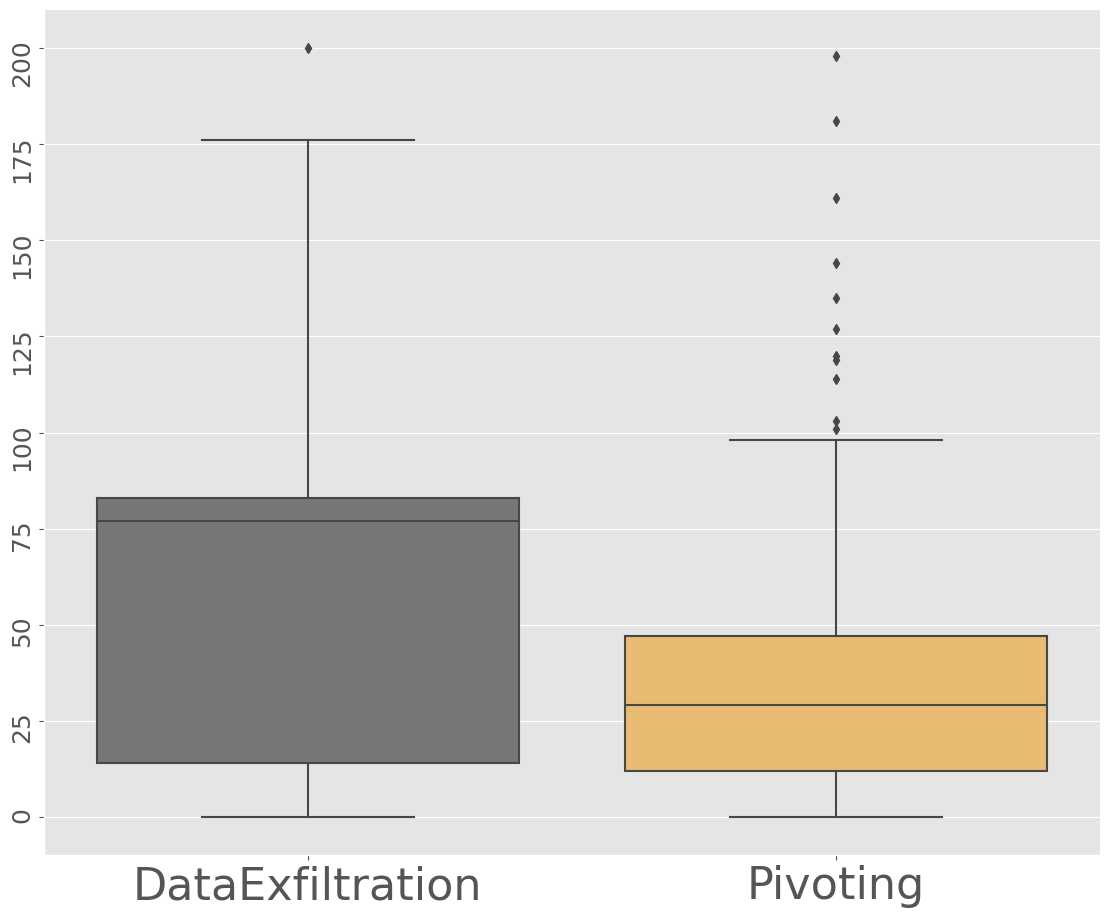

In [ ]:
g = sns.catplot(x="Label", y="Total Bwd packets", data=dataset_PDE, kind="box", aspect=1.5, palette=sns.color_palette([sns.color_palette()[3], sns.color_palette()[4]]))
g.fig.set_figwidth(12)
g.fig.set_figheight(10)
#plt.title("Label vs PSH Flag Count")
#plt.ylim(0, 8000)
plt.xticks(fontsize=32)
plt.yticks(fontsize=18,  rotation = 90)
plt.xlabel(None)
plt.ylabel(None)

plt.show()

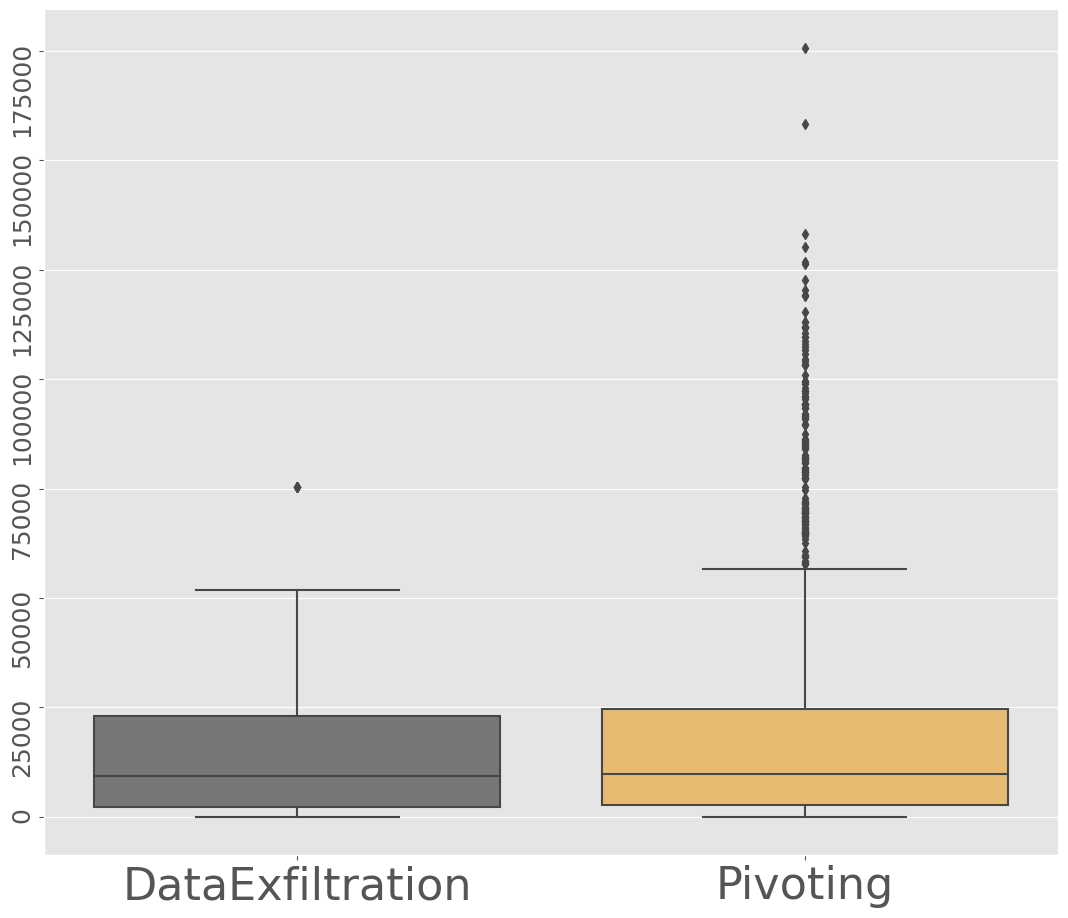

In [ ]:
g = sns.catplot(x="Label", y="Bwd Bytes/Bulk Avg", data=dataset_PDE, kind="box", aspect=1.5, palette=sns.color_palette([sns.color_palette()[3], sns.color_palette()[4]]))
g.fig.set_figwidth(12)
g.fig.set_figheight(10)
#plt.title("Label vs PSH Flag Count")
#plt.ylim(0, 8000)
plt.xticks(fontsize=32)
plt.yticks(fontsize=18,  rotation = 90)
plt.xlabel(None)
plt.ylabel(None)

plt.show()

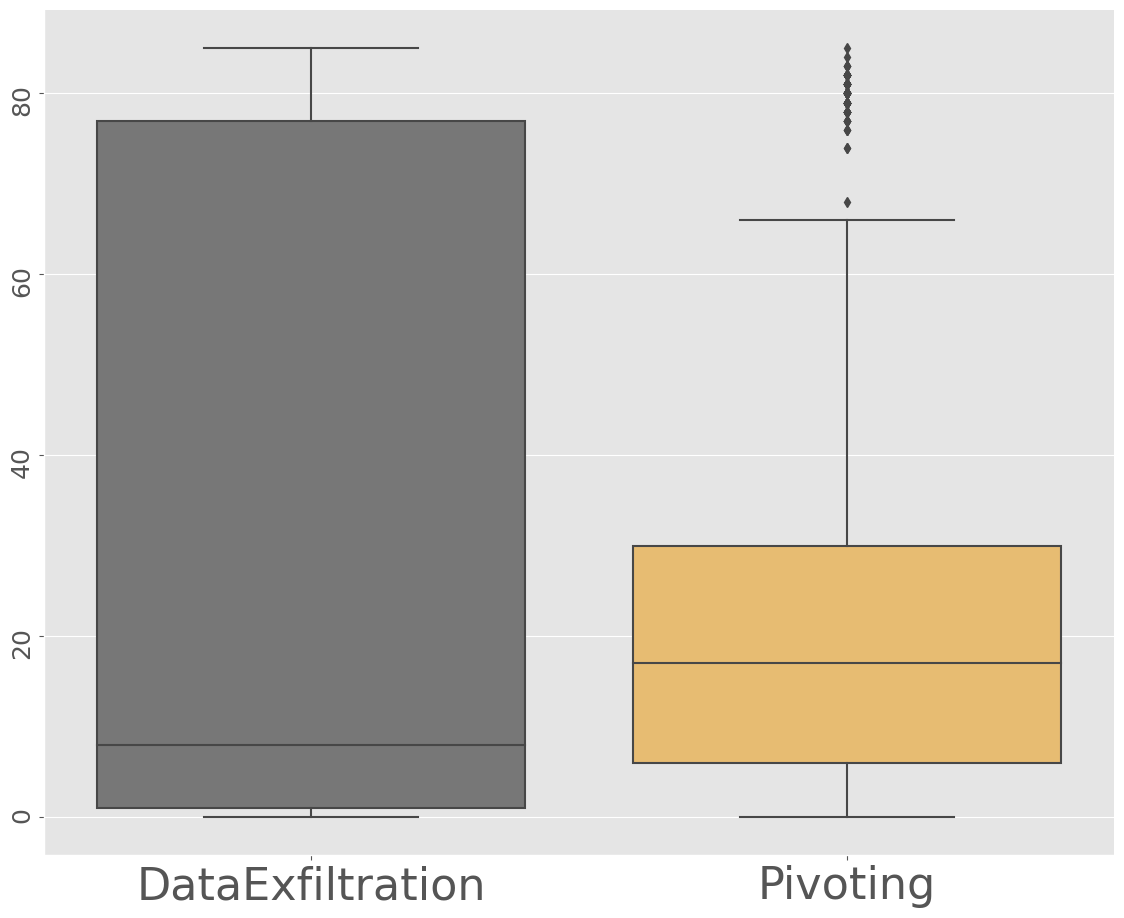

In [ ]:
g = sns.catplot(x="Label", y="PSH Flag Count", data=dataset_PDE, kind="box", aspect=1.5, palette=sns.color_palette([sns.color_palette()[3], sns.color_palette()[4]]))
g.fig.set_figwidth(12)
g.fig.set_figheight(10)
#plt.title("Label vs PSH Flag Count")
#plt.ylim(0, 8000)
plt.xticks(fontsize=32)
plt.yticks(fontsize=18,  rotation = 90)
plt.xlabel(None)
plt.ylabel(None)

plt.show()

## WYKRES POROWNANIE BASELINES

In [ ]:
baselines = pd.DataFrame([[0.204, 0.277,0.276], [0.660,0.752,0.857], [0.666,0.801,0.833], [0.998, 0.999,0.999], [0.838,0.840,0.875], [0.698,0.680,0.765], [0.678, 0.725, 0.765]], columns = ['GB (TensorFlow)', 'XGBoost', 'RF (TensorFlow)'], index= ['DataExfiltration', 'InitialCompromise', 'LateralMovement', 'NormalTraffic', 'Pivoting', 'Reconnaissance', 'Średnio'])

In [ ]:
baselines

,GB (TensorFlow),XGBoost,RF (TensorFlow)
DataExfiltration,0.204,0.277,0.276
InitialCompromise,0.660,0.752,0.857
LateralMovement,0.666,0.801,0.833
NormalTraffic,0.998,0.999,0.999
Pivoting,0.838,0.840,0.875
Reconnaissance,0.698,0.680,0.765
Średnio,0.678,0.725,0.765


<Axes: xlabel='Kategoria', ylabel='Miara F1'>

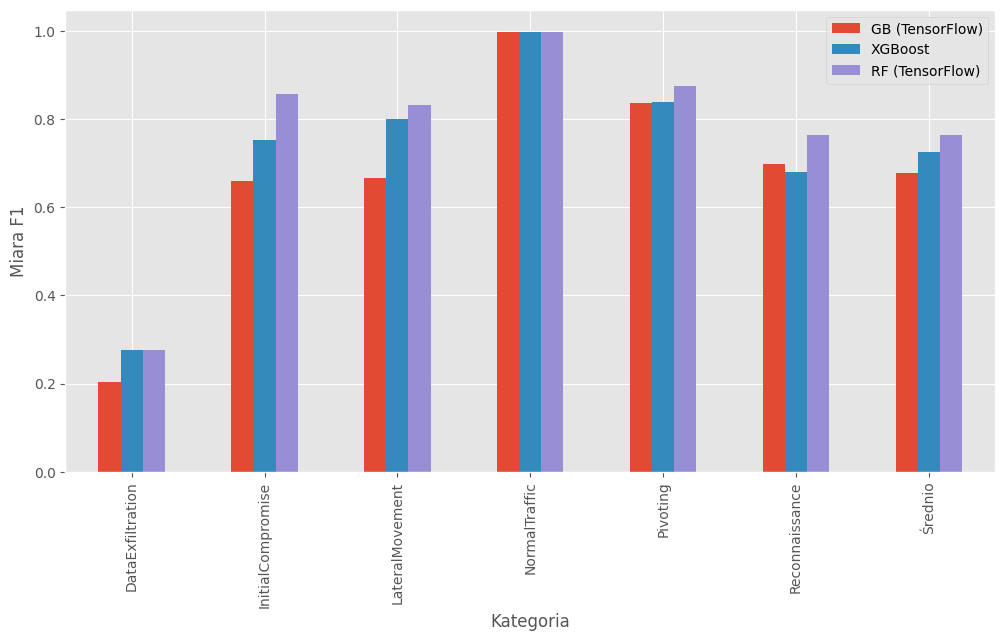

In [ ]:
baselines.plot.bar(ylabel = 'Miara F1', xlabel = 'Kategoria')

In [ ]:
#baselines.plot.bar(colormap = sns.color_palette())

In [ ]:
type(sns.color_palette())

seaborn.palettes._ColorPalette

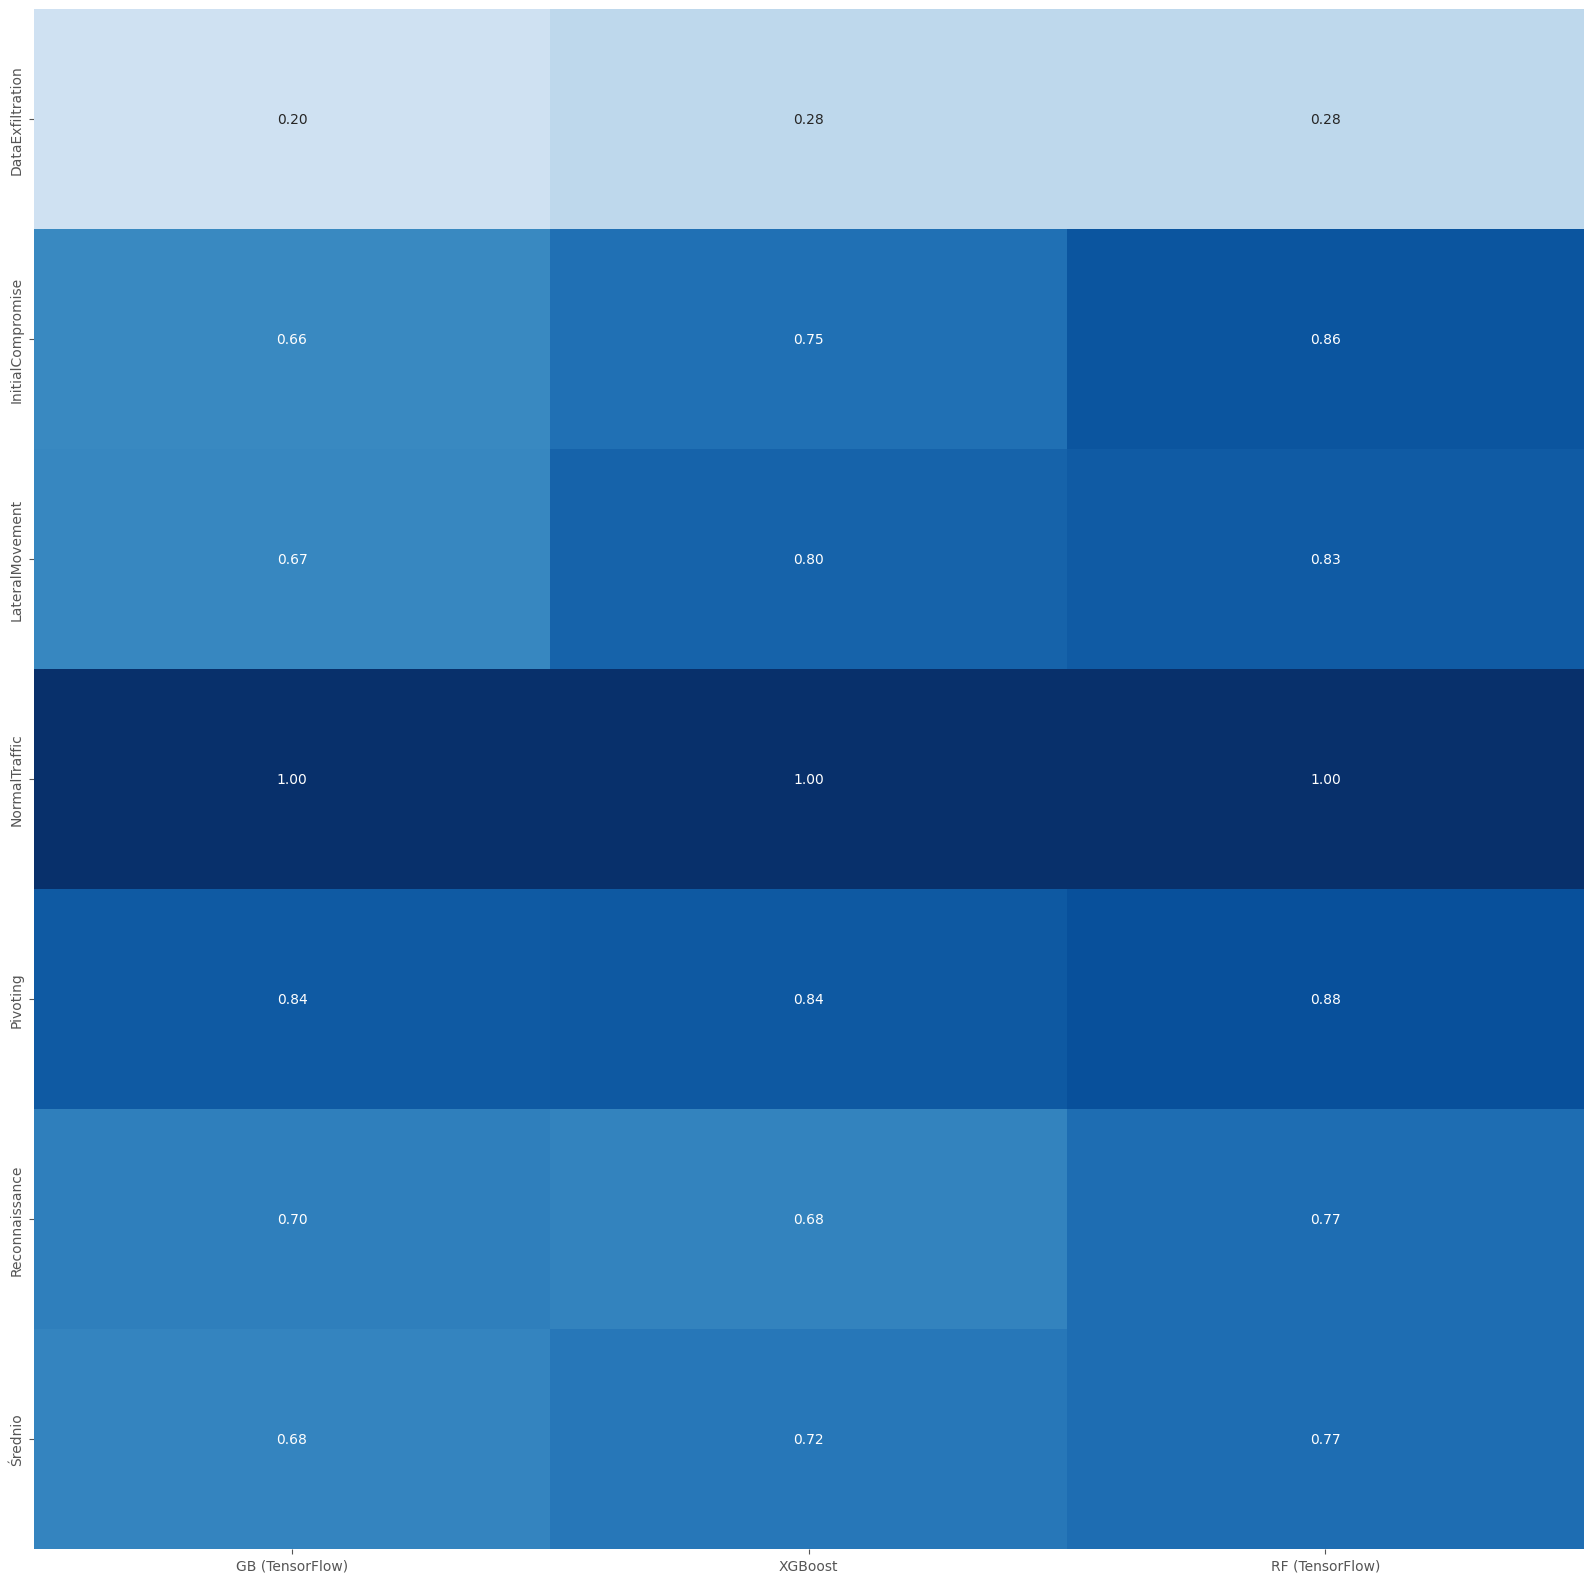

In [ ]:
plt.figure(figsize = (20, 20))
hm = sns.heatmap(baselines,
                 cbar=False,
                 annot=True,
                 square=False,
                 linecolor = 'black',
                 vmin = 0.0,
                 vmax = 1.0,
                 fmt='.2f',
                 annot_kws={'size': 10},
                 yticklabels=baselines.index,
                 xticklabels=baselines.columns,
                 cmap="Blues")

In [ ]:
#t-sne implementation according to: https://github.com/aviolante/sas-python-work/blob/master/tSneExampleBlogPost.ipynb

In [ ]:
# Load Python Libraries
import swat
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from time import time
%matplotlib inline
from sklearn.manifold import TSNE
from keras.datasets import mnist
from sklearn.datasets import load_iris
from numpy import reshape
import seaborn as sns
import pandas as pd

ModuleNotFoundError: ignored

In [ ]:
# dropping irrelevent columns

test = test.drop(['Src IP', 'Src Port', 'Dst IP', 'Dst Port', 'Flow ID', 'Protocol', 'Timestamp'], axis=1)
ALOT = 1e18
test.replace(np.inf, ALOT, inplace=True)
test = test.dropna().reset_index(drop = True)


In [ ]:
dataset = dataset.drop(['Src IP', 'Src Port', 'Dst IP', 'Dst Port', 'Flow ID', 'Protocol', 'Timestamp'], axis=1)
ALOT = 1e18
dataset.replace(np.inf, ALOT, inplace=True)
dataset = dataset.dropna().reset_index(drop = True)

In [ ]:
tsne2 = TSNE(n_components=2, verbose=1, random_state=123, perplexity= 45, learning_rate = 10000)
z1 = tsne2.fit_transform(dataset.drop(['Label'], axis = 1))

NameError: ignored

In [ ]:
tsne_result = z1
# Plot the result of our TSNE with the label color coded
# A lot of the stuff here is about making the plot look pretty and not TSNE
tsne_result_df = pd.DataFrame({'tsne_1': tsne_result[:,0], 'tsne_2': tsne_result[:,1], 'label': dataset['Label']})
fig, ax = plt.subplots(1)
fig.set_size_inches(12, 8)
sns.scatterplot(x='tsne_1', y='tsne_2', hue='label', data=tsne_result_df, ax=ax,s=120)
lim = (tsne_result.min()-5, tsne_result.max()+5)
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_aspect('equal')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

NameError: ignored

In [ ]:
df = pd.DataFrame()
df["y"] = dataset['Label']
df["comp-1"] = z1[:,0]
df["comp-2"] = z1[:,1]

fig = plt.gcf()

# Change seaborn plot size
fig.set_size_inches(12, 8)

sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                palette=sns.color_palette("hls", 6),
                data=df).set(title="Iris data T-SNE projection")

NameError: ignored

In [ ]:
import matplotlib as mpl
import sys
import sklearn#import dython
print(pd.__version__)
print(sns.__version__)
print(mpl.__version__)
print(sys.version)
print(sklearn.__version__)
#!pip install tensorflow_decision_forests
import xgboost as xgb
print(xgb.__version__)


1.5.3
0.12.2
3.7.1
3.10.12 (main, Jun 11 2023, 05:26:28) [GCC 11.4.0]
1.2.2
1.7.6


## Making train chains plot

In [ ]:
# poszczegolne lancuchy zapisane w ramkach: train1, train2, train3, train4

In [ ]:
  train1 = pd.read_csv("lancuch1_train.csv", sep = ';')
  train2 = pd.read_csv("lancuch2_train.csv", sep = ';')
  train3 = pd.read_csv("lancuch3_train.csv", sep = ';')
  train4 = pd.read_csv("lancuch4_train.csv", sep = ';')
  test = pd.read_csv("Testing.csv", sep=',')

In [ ]:
# make proper timestamps:

def tryconvert(x):
  try:

    return dt.datetime.strptime(x, '%Y-%m-%d %H:%M:%S')
  except:
    #print(type(x))
    return dt.datetime.strptime(x, '%d/%m/%Y %H:%M')

train1['Timestamp'] = train1['Timestamp'].apply(lambda x: tryconvert(x))
train2['Timestamp'] = train2['Timestamp'].apply(lambda x: tryconvert(x))
train3['Timestamp'] = train3['Timestamp'].apply(lambda x: tryconvert(x))
train4['Timestamp'] = train4['Timestamp'].apply(lambda x: tryconvert(x))

time_frames = [train1[['Timestamp', 'Label']], train2[['Timestamp', 'Label']], train3[['Timestamp', 'Label']], train4[['Timestamp', 'Label']]]
# convert timestamps for testing_df
#testing_df['Timestamp'] = testing_df['Timestamp'].apply(lambda x: dt.datetime.strptime(x, '%m/%d/%Y %H:%M').timestamp())
#print(training_df['Timestamp'])

In [ ]:
train_times = pd.concat(time_frames)

In [ ]:
#train_times['Timestamp'] = train_times['Timestamp'].apply(lambda x: x.time())
train_times

,Timestamp,Label
0,2015-10-21 09:57:00,InitialCompromise
1,2015-10-21 09:57:00,InitialCompromise
2,2015-10-21 09:57:00,InitialCompromise
3,2015-10-21 09:58:00,InitialCompromise
4,2015-10-21 09:58:00,InitialCompromise
...,...,...
688,2015-10-21 23:01:00,Pivoting
689,2015-10-21 23:01:00,DataExfiltration
690,2015-10-21 23:01:00,Pivoting
691,2015-10-21 23:01:00,Pivoting


In [ ]:
from matplotlib.dates import date2num as d2n

time1 = train1['Timestamp'].apply(lambda x: d2n(x))
time2 = train2['Timestamp'].apply(lambda x: d2n(x))
time3 = train3['Timestamp'].apply(lambda x: d2n(x))
time4 = train4['Timestamp'].apply(lambda x: d2n(x))
#time5 =

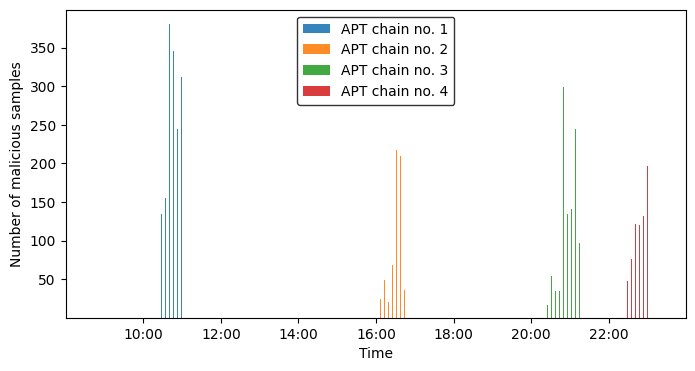

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime

# Ustawienie rozmiaru figury
plt.figure(figsize=(8,4))

# Ustawienie stylu na domyślny (białe tło)
plt.style.use('default')

# Przykładowe dane (zakładam, że twoje dane są już wczytane i są dostępne w train1, train2 itp.)

# Tworzenie histogramu
plt.hist([train1['Timestamp'], train2['Timestamp'], train3['Timestamp'], train4['Timestamp']],
         bins=128,
         label=['APT chain no. 1', 'APT chain no. 2', 'APT chain no. 3', 'APT chain no. 4'],
         alpha=0.9)  # Dodano przezroczystość, aby łatwiej było zauważyć nakładające się obszary

# Ustawienie legendy z ramką
legend = plt.legend(frameon=True)
frame = legend.get_frame()
frame.set_facecolor('white')
frame.set_edgecolor('black')

# Ustawienie zakresu osi X
plt.xlim(d2n(datetime.datetime(2015, 10, 21, 8, 00)), d2n(datetime.datetime(2015, 10, 21, 23, 59)))

# Ustawienie formatu osi X
ax = plt.gca()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

# Ustawienie tytułu oraz etykiet osi
#plt.title('Distribution of Malicious Samples Over Time in Training Set')
plt.xlabel('Time')
plt.ylabel('Number of malicious samples')

# Wyłączenie siatki
ax.grid(False)

# Ustawienie ramki wokół wykresu
for spine in ax.spines.values():
    spine.set_visible(True)
    spine.set_color('black')

    # Usunięcie pierwszej i ostatniej pozycji z osi X
xticks = ax.get_xticks().tolist()
if xticks:
    xticks = xticks[1:]
ax.set_xticks(xticks)


# Usunięcie pierwszej i ostatniej pozycji z osi Y
yticks = ax.get_yticks().tolist()
if yticks:
    yticks = yticks[1:-1]
ax.set_yticks(yticks)

# Ustawienie białego tła
ax.set_facecolor('white')

# Wyświetlenie wykresu
plt.show()


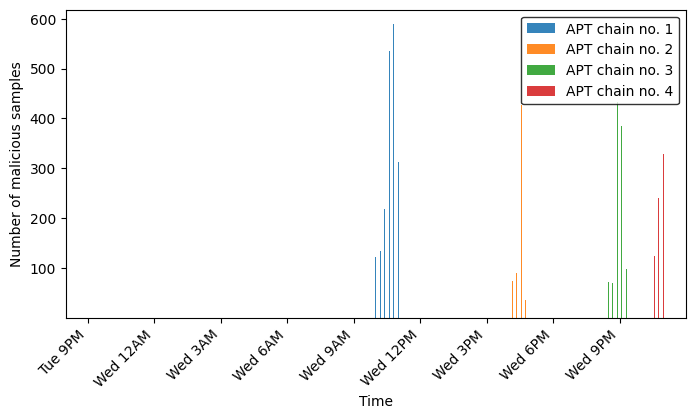

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime

# Ustawienie rozmiaru figury
plt.figure(figsize=(8, 4))

# Ustawienie stylu na domyślny (białe tło)
plt.style.use('default')

# Tworzenie histogramu
plt.hist([train1['Timestamp'], train2['Timestamp'], train3['Timestamp'], train4['Timestamp']],
         bins=64,
         label=['APT chain no. 1', 'APT chain no. 2', 'APT chain no. 3', 'APT chain no. 4'],
         alpha=0.9)  # Dodano przezroczystość, aby łatwiej było zauważyć nakładające się obszary

# Ustawienie legendy z ramką na górze po środku
legend = plt.legend(frameon=True, loc='upper right')
frame = legend.get_frame()
frame.set_facecolor('white')
frame.set_edgecolor('black')



# Ustawienie zakresu osi X
plt.xlim(d2n(datetime.datetime(2015, 10, 20, 20, 00)), d2n(datetime.datetime(2015, 10, 21, 23, 59)))

# Ustawienie formatu osi X na godziny AM/PM
ax = plt.gca()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%a %-I%p'))


# Ustawienie tytułu oraz etykiet osi
plt.xlabel('Time')
plt.ylabel('Number of malicious samples')

# Wyłączenie siatki
ax.grid(False)

# Ustawienie ramki wokół wykresu
for spine in ax.spines.values():
    spine.set_visible(True)
    spine.set_color('black')

# Usunięcie pierwszej i ostatniej pozycji z osi X
xticks = ax.get_xticks().tolist()
if xticks:
    xticks = xticks[0:]
ax.set_xticks(xticks)

# Pochyl etykiety na osi x o 45 stopni
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Usunięcie pierwszej i ostatniej pozycji z osi Y
yticks = ax.get_yticks().tolist()
if yticks:
    yticks = yticks[1:-1]
ax.set_yticks(yticks)

# Ustawienie białego tła
ax.set_facecolor('white')

# Wyświetlenie wykresu
plt.show()


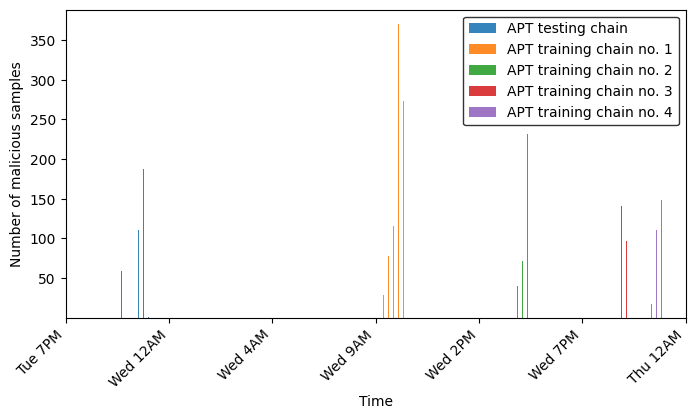

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime

# Ustawienie rozmiaru figury
plt.figure(figsize=(8, 4))

# Ustawienie stylu na domyślny (białe tło)
plt.style.use('default')



# Przekształcenie kolumny Timestamp na obiekt datetime
test['Timestamp'] = pd.to_datetime(test['Timestamp'])




# Tworzenie histogramu
plt.hist([[d2n(ts) for ts in test[test['Label'] != 'NormalTraffic']['Timestamp']], train1['Timestamp'], train2['Timestamp'], train3['Timestamp'], train4['Timestamp']],
         bins=220,
         label=['APT testing chain', 'APT training chain no. 1', 'APT training chain no. 2', 'APT training chain no. 3', 'APT training chain no. 4'],
         alpha=0.9)  # Dodano przezroczystość, aby łatwiej było zauważyć nakładające się obszary

# Ustawienie legendy z ramką na górze po środku
legend = plt.legend(frameon=True, loc='upper right')
frame = legend.get_frame()
frame.set_facecolor('white')
frame.set_edgecolor('black')



# Ustawienie zakresu osi X
plt.xlim(d2n(datetime.datetime(2015, 10, 20, 20, 00)), d2n(datetime.datetime(2015, 10, 21, 23, 59)))

# Ustawienie formatu osi X na godziny AM/PM
ax = plt.gca()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%a %-I%p'))


# Ustawienie tytułu oraz etykiet osi
plt.xlabel('Time')
plt.ylabel('Number of malicious samples')

# Wyłączenie siatki
ax.grid(False)

# Ustawienie ramki wokół wykresu
for spine in ax.spines.values():
    spine.set_visible(True)
    spine.set_color('black')

# Usunięcie pierwszej i ostatniej pozycji z osi X
xticks = ax.get_xticks().tolist()
if xticks:
    xticks = xticks[0:]
ax.set_xticks(xticks)

# Pochyl etykiety na osi x o 45 stopni
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Usunięcie pierwszej i ostatniej pozycji z osi Y
yticks = ax.get_yticks().tolist()
if yticks:
    yticks = yticks[1:-1]
ax.set_yticks(yticks)

# Ustawienie białego tła
ax.set_facecolor('white')

# Wyświetlenie wykresu
plt.show()


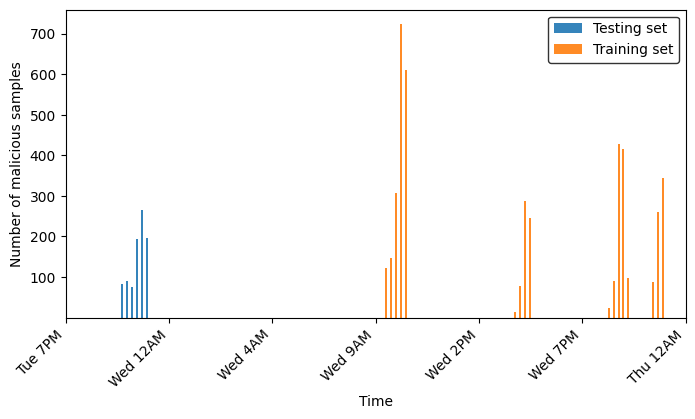

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime

# Ustawienie rozmiaru figury
plt.figure(figsize=(8, 4))

# Ustawienie stylu na domyślny (białe tło)
plt.style.use('default')



# Przekształcenie kolumny Timestamp na obiekt datetime
test['Timestamp'] = pd.to_datetime(test['Timestamp'])
train = pd.concat([train1, train2, train3, train4])



# Tworzenie histogramu
plt.hist([[d2n(ts) for ts in test[test['Label'] != 'NormalTraffic']['Timestamp']], train['Timestamp']],
         bins=110,
         label=['Testing set', 'Training set'],
         alpha=0.9)  # Dodano przezroczystość, aby łatwiej było zauważyć nakładające się obszary

# Ustawienie legendy z ramką na górze po środku
legend = plt.legend(frameon=True, loc='upper right')
frame = legend.get_frame()
frame.set_facecolor('white')
frame.set_edgecolor('black')



# Ustawienie zakresu osi X
plt.xlim(d2n(datetime.datetime(2015, 10, 20, 20, 00)), d2n(datetime.datetime(2015, 10, 21, 23, 59)))

# Ustawienie formatu osi X na godziny AM/PM
ax = plt.gca()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%a %-I%p'))


# Ustawienie tytułu oraz etykiet osi
plt.xlabel('Time')
plt.ylabel('Number of malicious samples')

# Wyłączenie siatki
ax.grid(False)

# Ustawienie ramki wokół wykresu
for spine in ax.spines.values():
    spine.set_visible(True)
    spine.set_color('black')

# Usunięcie pierwszej i ostatniej pozycji z osi X
xticks = ax.get_xticks().tolist()
if xticks:
    xticks = xticks[0:]
ax.set_xticks(xticks)

# Pochyl etykiety na osi x o 45 stopni
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Usunięcie pierwszej i ostatniej pozycji z osi Y
yticks = ax.get_yticks().tolist()
if yticks:
    yticks = yticks[1:-1]
ax.set_yticks(yticks)

# Ustawienie białego tła
ax.set_facecolor('white')

# Wyświetlenie wykresu
plt.show()


In [ ]:
#TO JEST POPRAWNIE DZIALAJACE WYSTARCZY URUCHOMIC IMPORT DANYCH I ODPALIC TA KOMORKE

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime
import pandas as pd

from sklearn.model_selection import train_test_split


# Przekształcenie kolumny Timestamp na obiekt datetime
test['Timestamp'] = pd.to_datetime(test['Timestamp'])
train = pd.concat([train1, train2, train3, train4])

# Połącz dane z train i test
#all_data = pd.concat([train, test[test['Label']!='NormalTraffic']], ignore_index=True)

# Podziel dane na dwa zbiory (st'), ale tak naprawdę jest to tylko technika mieszania
#train, test = train_test_split(all_data, test_size=0.2, random_state=42)

# Funkcja pomocnicza do konwersji daty na format numeryczny
def d2n(dt):
    return mdates.date2num(dt)

# ... [Tutaj zakładam, że masz wcześniej wczytane dane]

# Ustawienie rozmiaru figury
plt.figure(figsize=(8, 4))

# Ustawienie stylu
plt.style.use('default')

ax = plt.gca()

# Ustawienie formatu osi X
ax.xaxis.set_major_formatter(mdates.DateFormatter('%a %-I%p'))

# Ustawienie zakresu osi X
plt.xlim(d2n(datetime.datetime(2015, 10, 20, 20, 00)), d2n(datetime.datetime(2015, 10, 21, 23, 59)))

chains = [
    (datetime.datetime(2015, 10, 20, 21, 30), datetime.datetime(2015, 10, 20, 23, 30), "Chain #1", 'yellow'),
    (datetime.datetime(2015, 10, 21, 9, 30), datetime.datetime(2015, 10, 21, 11, 30), "Chain #2", 'yellow'),
    (datetime.datetime(2015, 10, 21, 15, 30), datetime.datetime(2015, 10, 21, 17, 20), "Chain #3", 'yellow'),
    (datetime.datetime(2015, 10, 21, 20, 15), datetime.datetime(2015, 10, 21, 21, 30), "Chain #4", 'yellow'),
    (datetime.datetime(2015, 10, 21, 22, 15), datetime.datetime(2015, 10, 21, 23, 10), "Chain #5", 'yellow')
]

for start, end, label, color in chains:
    ax.axvspan(d2n(start), d2n(end), color=color, alpha=0.15)

# Renderowanie histogramu z ustawieniem stackowania słupków
plt.hist([ [d2n(ts) for ts in test[test['Label'] != 'NormalTraffic']['Timestamp']], [d2n(ts) for ts in train['Timestamp']] ],
         bins=110,
         label=['Testing set', 'Training set'],
         alpha=1.0,
         stacked=False)

# Dodanie tekstu dla łańcuchów po renderowaniu histogramu
for start, end, label, color in chains:
    ax.text((d2n(start) + d2n(end)) / 2, ax.get_ylim()[1] * 0.6, label, ha='center', rotation=90)

# Ustawienie legendy
legend = plt.legend(frameon=True, loc='upper right', framealpha = 1.0)
frame = legend.get_frame()
frame.set_facecolor('white')
frame.set_edgecolor('black')

# Ustawienie tytułu oraz etykiet osi
plt.xlabel('Time')
plt.ylabel('Number of malicious samples')

# Wyłączenie siatki
ax.grid(False)

# Ustawienie ramki wokół wykresu
for spine in ax.spines.values():
    spine.set_visible(True)
    spine.set_color('black')

# Usunięcie pierwszej i ostatniej pozycji z osi X
xticks = ax.get_xticks().tolist()
if xticks:
    xticks = xticks[0:]
ax.set_xticks(xticks)

# Pochyl etykiety na osi x o 45 stopni
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Usunięcie pierwszej i ostatniej pozycji z osi Y
yticks = ax.get_yticks().tolist()
if yticks:
    yticks = yticks[1:-1]
ax.set_yticks(yticks)

# Ustawienie białego tła
ax.set_facecolor('white')

# Wyświetlenie wykresu
plt.show()


NameError: ignored

IndexError: ignored

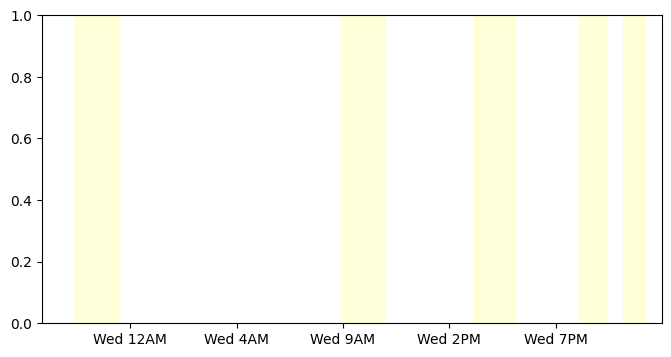

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime

def plot_histogram(train, test):
    # Funkcja pomocnicza do konwersji daty na format numeryczny
    def d2n(dt):
        return mdates.date2num(dt)

    # Ustawienie rozmiaru figury
    plt.figure(figsize=(8, 4))

    # Ustawienie stylu
    plt.style.use('default')

    ax = plt.gca()

    # Ustawienie formatu osi X
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%a %-I%p'))

    # Ustawienie zakresu osi X
    plt.xlim(d2n(datetime.datetime(2015, 10, 20, 20, 00)), d2n(datetime.datetime(2015, 10, 21, 23, 59)))

    chains = [
        (datetime.datetime(2015, 10, 20, 21, 30), datetime.datetime(2015, 10, 20, 23, 30), "Chain #1", 'yellow'),
        (datetime.datetime(2015, 10, 21, 9, 30), datetime.datetime(2015, 10, 21, 11, 30), "Chain #2", 'yellow'),
        (datetime.datetime(2015, 10, 21, 15, 30), datetime.datetime(2015, 10, 21, 17, 20), "Chain #3", 'yellow'),
        (datetime.datetime(2015, 10, 21, 20, 15), datetime.datetime(2015, 10, 21, 21, 30), "Chain #4", 'yellow'),
        (datetime.datetime(2015, 10, 21, 22, 15), datetime.datetime(2015, 10, 21, 23, 10), "Chain #5", 'yellow')
    ]

    for start, end, label, color in chains:
        ax.axvspan(d2n(start), d2n(end), color=color, alpha=0.15)

    # Renderowanie histogramu
    plt.hist([ [d2n(ts) for ts in test[test['Label'] != 'NormalTraffic']['Timestamp']], [d2n(ts) for ts in train[train['Label'] != 'NormalTraffic']['Timestamp']] ],
             bins=110,
             label=['Testing set', 'Training set'],
             alpha=1.0)

    # Dodanie tekstu dla łańcuchów po renderowaniu histogramu
    for start, end, label, color in chains:
        ax.text((d2n(start) + d2n(end)) / 2, ax.get_ylim()[1] * 0.6, label, ha='center', rotation=90)

    # Ustawienie legendy
    legend = plt.legend(frameon=True, loc='upper right', framealpha=1.0)
    frame = legend.get_frame()
    frame.set_facecolor('white')
    frame.set_edgecolor('black')

    # Ustawienie tytułu oraz etykiet osi
    plt.xlabel('Time')
    plt.ylabel('Number of malicious samples')

    # Wyłączenie siatki
    ax.grid(False)

    # Ustawienie ramki wokół wykresu
    for spine in ax.spines.values():
        spine.set_visible(True)
        spine.set_color('black')

    # Usunięcie pierwszej i ostatniej pozycji z osi X
    xticks = ax.get_xticks().tolist()
    if xticks:
        xticks = xticks[1:-1]
    ax.set_xticks(xticks)

    # Pochyl etykiety na osi x o 45 stopni
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

    # Usunięcie pierwszej i ostatniej pozycji z osi Y
    yticks = ax.get_yticks().tolist()
    if yticks:
        yticks = yticks[1:-1]
    ax.set_yticks(yticks)

    # Ustawienie białego tła
    ax.set_facecolor('white')

    # Wyświetlenie wykresu
    plt.show()

# Aby użyć funkcji, po prostu podaj swoje dane treningowe i testowe jako argumenty:
train = pd.read_csv("Training.csv")
test = pd.read_csv("Testing.csv")
plot_histogram(train, test)


In [ ]:
test_times = [d2n(ts) for ts in test[test['Label'] != 'NormalTraffic']['Timestamp']]
train_times = [d2n(ts) for ts in train[train['Label'] != 'NormalTraffic']['Timestamp']]

print("Test times:", test_times)
print("Train times:", train_times)


IndexError: ignored

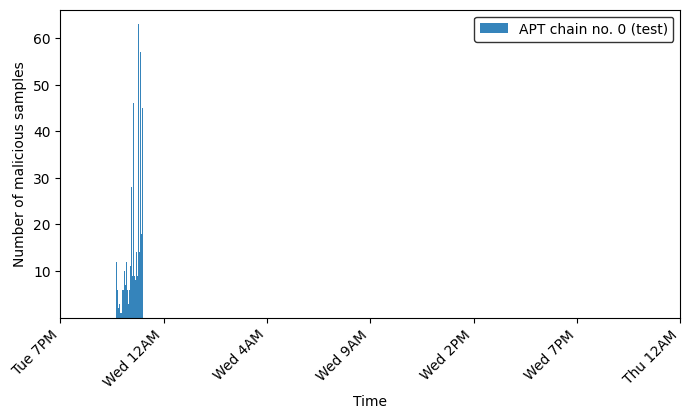

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime

# Ustawienie rozmiaru figury
plt.figure(figsize=(8, 4))

# Ustawienie stylu na domyślny (białe tło)
plt.style.use('default')

# Przekształcenie kolumny Timestamp na obiekt datetime
test['Timestamp'] = pd.to_datetime(test['Timestamp'])

# Tworzenie histogramu
plt.hist([d2n(ts) for ts in test[test['Label'] != 'NormalTraffic']['Timestamp']],
         bins=64,
         label=['APT chain no. 0 (test)'],
         alpha=0.9)  # Dodano przezroczystość, aby łatwiej było zauważyć nakładające się obszary

# Ustawienie legendy z ramką na górze po środku
legend = plt.legend(frameon=True, loc='upper right')
frame = legend.get_frame()
frame.set_facecolor('white')
frame.set_edgecolor('black')



# Ustawienie zakresu osi X
plt.xlim(d2n(datetime.datetime(2015, 10, 20, 21, 00)), d2n(datetime.datetime(2015, 10, 21, 23, 59)))

# Ustawienie formatu osi X na godziny AM/PM
ax = plt.gca()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%a %-I%p'))


# Ustawienie tytułu oraz etykiet osi
plt.xlabel('Time')
plt.ylabel('Number of malicious samples')

# Wyłączenie siatki
ax.grid(False)

# Ustawienie ramki wokół wykresu
for spine in ax.spines.values():
    spine.set_visible(True)
    spine.set_color('black')

# Usunięcie pierwszej i ostatniej pozycji z osi X
xticks = ax.get_xticks().tolist()
if xticks:
    xticks = xticks[0:]
ax.set_xticks(xticks)

# Pochyl etykiety na osi x o 45 stopni
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Usunięcie pierwszej i ostatniej pozycji z osi Y
yticks = ax.get_yticks().tolist()
if yticks:
    yticks = yticks[1:-1]
ax.set_yticks(yticks)

# Ustawienie białego tła
ax.set_facecolor('white')

# Wyświetlenie wykresu
plt.show()


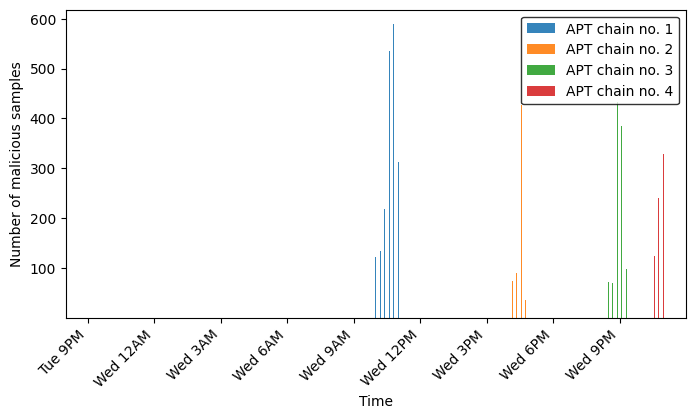

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime

# Funkcja pomocnicza do konwersji daty na format numeryczny
def d2n(dt):
    return mdates.date2num(dt)

# Ustawienie rozmiaru figury
plt.figure(figsize=(8,4))

# Ustawienie stylu na domyślny (białe tło)
plt.style.use('default')

# Przekształcenie kolumny Timestamp na obiekt datetime
test['Timestamp'] = pd.to_datetime(test['Timestamp'])

# Tworzenie histogramu
plt.hist([d2n(ts) for ts in test[test['Label'] != 'NormalTraffic']['Timestamp']],
         bins=500,
         label=['APT test chain'],
         alpha=0.9)  # Dodano przezroczystość, aby łatwiej było zauważyć nakładające się obszary

# Ustawienie legendy z ramką
legend = plt.legend(frameon=True)
frame = legend.get_frame()
frame.set_facecolor('white')
frame.set_edgecolor('black')

# Ustawienie zakresu osi X
plt.xlim(d2n(datetime.datetime(2015, 10, 20, 20, 00)), d2n(datetime.datetime(2015, 10, 20, 23, 59)))

# Ustawienie formatu osi X
ax = plt.gca()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

# Ustawienie tytułu oraz etykiet osi
#plt.title('Distribution of Malicious Samples Over Time in Training Set')
plt.xlabel('Time')
plt.ylabel('Number of malicious samples')

# Wyłączenie siatki
ax.grid(False)


# Usunięcie pierwszej i ostatniej pozycji z osi Y
yticks = ax.get_yticks().tolist()
if yticks:
    yticks = yticks[1:-1]
ax.set_yticks(yticks)

# Ustawienie ramki wokół wykresu
for spine in ax.spines.values():
    spine.set_visible(True)
    spine.set_color('black')

# Ustawienie białego tła
ax.set_facecolor('white')

# Wyświetlenie wykresu
plt.show()


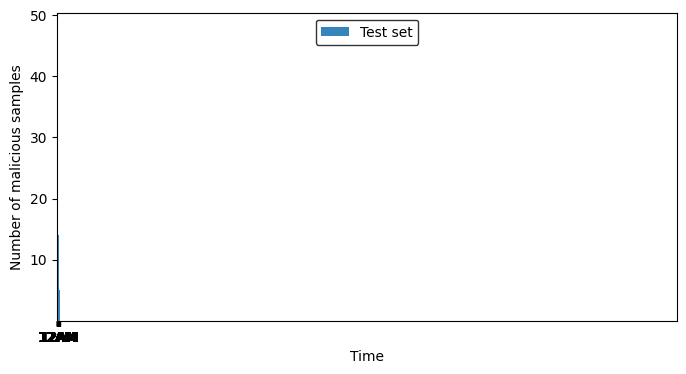

In [ ]:
test[test['Label'] != 'NormalTraffic']['Timestamp']

In [ ]:
test[test['Label'] != 'NormalTraffic']['Timestamp']

36360    10/20/2015 21:46
36362    10/20/2015 21:46
36363    10/20/2015 21:46
36385    10/20/2015 21:46
36609    10/20/2015 21:47
               ...       
54773    10/20/2015 23:01
54774    10/20/2015 23:01
54776    10/20/2015 23:01
54777    10/20/2015 23:01
54870    10/20/2015 23:02
Name: Timestamp, Length: 904, dtype: object

In [ ]:
print(test[test['Label'] != 'NormalTraffic']['Timestamp'].min())
print(test[test['Label'] != 'NormalTraffic']['Timestamp'].max())



2015-10-20 21:46:00
2015-10-20 23:02:00


In [ ]:
counts1 = train1['Label'].value_counts()
counts2 = train2['Label'].value_counts()
counts3 = train3['Label'].value_counts()
counts4 = train4['Label'].value_counts()
counts5 = test['Label'].value_counts().drop(labels = ['NormalTraffic'])

In [ ]:
chain_counts = pd.concat([counts1, counts2, counts3, counts4, counts5], axis = 1)
chain_counts.columns = ['Train #1', 'Train #2', 'Train #3', 'Train #4', 'Test']
chain_counts.head()
#chain_counts.reindex('') - nie bo nie ma NormalTraffic tu (poza tym kolejnosc sie zgadza) - wiec trzeba to pewnie zrobic normalnie colorsami

In [ ]:
chain_counts.plot.bar(ylabel = 'Ilość próbek', logy = False)

In [ ]:
chain_counts_trans = chain_counts.transpose()

In [ ]:
chain_counts_trans.plot.bar(ylabel = 'Ilość próbek', xlabel = 'Łańcuch ataku', logy = False)

## Inf nan analiza

In [ ]:
#co trzeba wiedziec:
# -ile Inf
# -ile NaN
# -ile zawiera jedno i drugie --- tego chyba nie trzeba
# -sumarycznie (jedno albo drugie) :)

# z tego zostanie zbudowana tabela

In [ ]:
#najpierw sprawdzenie nanów:

In [ ]:
#ile probek dla train jest nan
train.isnull().sum(axis = 1).sum()

In [ ]:
#ile probek dla test jest nan
test.isnull().sum(axis = 1).sum()

In [ ]:
# drop nan
train = train.dropna().reset_index(drop = True)
test = test.dropna().reset_index(drop = True)

# replace inf with nan
train.replace(np.inf, np.nan, inplace = True)
test.replace(np.inf, np.nan, inplace = True)

In [ ]:
#ile probek dla train jest inf
train.isnull().sum(axis = 1).sum()

In [ ]:
#ile probek dla test jest inf
test.isnull().sum(axis = 1).sum()

In [ ]:
# reload datasets
train = pd.read_csv("Training.csv")
test = pd.read_csv("Testing.csv")

# replace inf with nan
train.replace(np.inf, np.nan, inplace = True)
test.replace(np.inf, np.nan, inplace = True)

In [ ]:
#ile probek dla train jest inf albo nan
train_arr = train.isnull().sum(axis = 1).values
train_arr[train_arr > 0] = 1
train_arr.sum()

In [ ]:
#ile probek dla test jest inf albo nan
test_arr = test.isnull().sum(axis = 1).values
test_arr[test_arr > 0] = 1
test_arr.sum()

In [ ]:
# ponowne zaladowanie danych
train = pd.read_csv("Training.csv")
test = pd.read_csv("Testing.csv")

In [ ]:
# dane wykorzystane do wykresow

train_df = pd.Series([259120, 1810])
test_df = pd.Series([56487, 560])

In [ ]:
# rysowanie wykresow

fig, axes = plt.subplots(1, 2, sharex = True, sharey = True)

axes[0].set_title('Zbiór trenujący')
train_df.plot(ax = axes[0], kind = 'pie', labels = None)

axes[1].set_title('Zbiór testujący')
test_df.plot(ax = axes[1], kind = 'pie', labels = None)

fig.legend(loc=0, labels = ['Wszystkie próbki', 'Wartości Inf/NaN'], prop={'size': 11})

axes[0].set_ylabel('Ilość próbek')

In [ ]:
# dane wykorzystane do wykresu ratio (trzeba je wyliczyc)
LM_train = (100/729)
LM_test = (100/142)
#LM_all = (2/871)

NT_train = (181000/259120)
NT_test = (56000/56487)
#NT_all = (2370/315607)

#d = {'Zbiór trenujący':[0.690, ]}

In [ ]:
d = {'NormalTraffic':[NT_train, NT_test], 'LateralMovement':[LM_train, LM_test]}
df = pd.DataFrame(data = d, index = ['Trenujący', 'Testujący'])
df.head()

In [ ]:
# rysowanie wykresu ratio
plt.style.use("ggplot")
df.plot(kind = 'bar')
plt.ylabel('Stosunek [%]')
plt.xlabel('Zbiór')